# Gathering aggregated ESG data on private companies and creating data-frames and graphs via Python functions and classes: Part 1

This article looks at building a Python framework to aid in investigating aggregated [Environmental, Social and Governance](https://www.investopedia.com/terms/e/environmental-social-and-governance-esg-criteria.asp#:~:text=Environmental%2C%20social%20and%20governance%20(ESG,use%20to%20screen%20potential%20investments.&text=Governance%20deals%20with%20a%20company's,internal%20controls%2C%20and%20shareholder%20rights.) (ESG) data on private companies.

It outlines the fashion in which one may attempt to use [Refinitiv](https://www.refinitiv.com/en)'s Python [Data Application Programming Interface](https://developers.refinitiv.com/eikon-apis/eikon-data-api) ([Python DAPI](https://docs-developers.refinitiv.com/1594387995587/14684/book/en/index.html)) to gather ESG data on all private companies included in the [MSCI World Index](https://emea1.apps.cp.thomsonreuters.com/web/Apps/Index/?s=.MIWO00000PUS&st=RIC&app=true) and then create graphs to uncover insight behind the data.

## Binary/[Boolean](https://en.wikipedia.org/wiki/Boolean_data_type) Data:

In this article, we will exemplify how one may gather data on
- Environmental Controversies (AnalyticEnvControv)
- Material Sourcing (EnvMaterialsSourcing) (global view - Stacked Area Chart - and ratio line graph)
- Environmental Supply Chain Management (EnvSupplyChainMgt) (global view - Stacked Area Chart - and ratio line graph)
- Policy Sustainable Packaging (PolicySustainablePackaging) (global view - Stacked Area Chart - and ratio line graph)

## Non-Binary data:

- Waste Recycled to Total Waste (AnalyticWasteRecyclingRatio) (median)

# Get to the Coding

## Import libraries

First we can use the library ' platform ' to show which version of Python we are using

In [1]:
# The ' from ... import ' structure here allows us to only import the module ' python_version ' from the library ' platform ':
from platform import python_version
print("This code runs on Python version " + python_version())

This code runs on Python version 3.7.7


$$ \\ $$
We use **Refinitiv's [Eikon Python Application Programming Interface (API)](https://developers.refinitiv.com/eikon-apis/eikon-data-api)** to access financial data. We can access it via the Python library "eikon" that can be installed simply by using $\textit{pip install}$.

In [2]:
import eikon as ek

# The key is placed in a text file so that it may be used in this code without showing it itself:
eikon_key = open("eikon.txt","r")
ek.set_app_key(str(eikon_key.read()))
# It is best to close the files we opened in order to make sure that we don't stop any other services/programs from accessing them if they need to:
eikon_key.close()

$$ \\ $$
The following are Python-built-in modules/libraries, therefore they do not have specific version numbers.

In [3]:
# datetime will allow us to manipulate Western World dates
import datetime

# dateutil will allow us to manipulate dates in equations
import dateutil

The Python library 'os' will allow us to retrieve the path of our running script

In [4]:
import os

The Python library 'warnings' will allow us to remove library depreciation warnings

In [5]:
import warnings
warnings.filterwarnings("ignore")

$$ \\ $$
numpy is needed for datasets' statistical and mathematical manipulations

In [6]:
import numpy
print("The numpy library imported in this code is version: " + numpy.__version__)

The numpy library imported in this code is version: 1.18.5


$$ \\ $$
pandas will be needed to manipulate data sets

In [7]:
import pandas
# This line will ensure that all columns of our dataframes are always shown:
pandas.set_option('display.max_columns', None)
print("The pandas library imported in this code is version: " + pandas.__version__)

The pandas library imported in this code is version: 1.0.5


openpyxl and xlsxwriter will be useful in manipulating Excel workbooks

In [8]:
import openpyxl
import xlsxwriter

$$ \\ $$
The bellow are needed to plot graphs of all kinds

In [9]:
import plotly
import plotly.express
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=False)

import cufflinks
cufflinks.go_offline()
# cufflinks.set_config_file(offline = True, world_readable = True)

# seaborn is needed to plot plotly line graphs from pandas data-frames
import seaborn

import matplotlib
# the use of ' as ... ' (specifically here: ' as plt ') allows us to create a shorthand for a module (here: ' matplotlib.pyplot ')
import matplotlib.pyplot as plt
%matplotlib inline

for i,j in zip(["plotly", "cufflinks", "seaborn", "matplotlib"], [plotly, cufflinks, seaborn, matplotlib]):
    print("The " + str(i) + " library imported in this code is version: " + j.__version__)

The plotly library imported in this code is version: 4.7.1
The cufflinks library imported in this code is version: 0.17.3
The seaborn library imported in this code is version: 0.10.1
The matplotlib library imported in this code is version: 3.2.1


## Coding

### Boolean data:

#### Example using 'Environmental Materials Sourcing':

I'd like to exemplify what we are trying to do in this article with 'Environmental Materials Sourcing'.
- 1st: Collect data from [Refinitiv](https://developers.refinitiv.com/eikon-apis/eikon-data-api)

In [10]:
df, err = ek.get_data(instruments = ['0#.MIWO00000PUS'],
                      fields = ['TR.HeadquartersCountry',
                                'TR.TRBCEconomicSector',
                                'TR.AnalyticEnvControv.date',
                                'TR.AnalyticEnvControv',
                                'TR.EnvMaterialsSourcing.date',
                                'TR.EnvMaterialsSourcing'],
                      parameters = {'SDate':'0',
                                    'EDate':'-19',
                                    'Period':'FY0',
                                    'Frq':'FY'})
df

Instrument   Country of Headquarters TRBC Economic Sector Name  \
0          ZTS.N  United States of America                Healthcare   
1          ZTS.N                                                       
2          ZTS.N                                                       
3          ZTS.N                                                       
4          ZTS.N                                                       
...          ...                       ...                       ...   
31598   CARLb.CO                                                       
31599   CARLb.CO                                                       
31600   CARLb.CO                                                       
31601   CARLb.CO                                                       
31602   CARLb.CO                                                       

                       Date Environmental Controversies                  Date  \
0      2018-12-31T00:00:00Z                       False  2018-12-31T00:00:00Z   
1      2017-12-31T00:00:00Z                       False  2017-12-31T00:00:00Z   
2      2016-12-31T00:00:00Z                       False  2016-12-31T00:00:00Z   
3      2015-12-31T00:00:00Z                       False  2015-12-31T00:00:00Z   
4      2014-12-31T00:00:00Z                       False  2014-12-31T00:00:00Z   
...                     ...                         ...                   ...   
31598  2004-12-31T00:00:00Z                       False  2004-12-31T00:00:00Z   
31599  2003-12-31T00:00:00Z                       False  2003-12-31T00:00:00Z   
31600  2002-12-31T00:00:00Z                       False  2002-12-31T00:00:00Z   
31601  2001-12-31T00:00:00Z                              2001-12-31T00:00:00Z   
31602  2000-12-31T00:00:00Z                              2000-12-31T00:00:00Z   

      Environmental Materials Sourcing  
0                                 True  
1                                False  
2                                False  
3                                False  
4                                False  
...                                ...  
31598                            False  
31599                            False  
31600                            False  
31601                                   
31602                                   

[31603 rows x 7 columns]

- 2nd: Fill in missing country values and sector

In [11]:
for i in range(len(df.index)):
    if df["Country of Headquarters"][i] == "":
        df.iloc[i]["Country of Headquarters"] = str(df["Country of Headquarters"][i-1])
    if df["TRBC Economic Sector Name"][i] == "":
        df.iloc[i]["TRBC Economic Sector Name"] = str(df["TRBC Economic Sector Name"][i-1])
df

Instrument   Country of Headquarters TRBC Economic Sector Name  \
0          ZTS.N  United States of America                Healthcare   
1          ZTS.N  United States of America                Healthcare   
2          ZTS.N  United States of America                Healthcare   
3          ZTS.N  United States of America                Healthcare   
4          ZTS.N  United States of America                Healthcare   
...          ...                       ...                       ...   
31598   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
31599   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
31600   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
31601   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
31602   CARLb.CO                   Denmark    Consumer Non-Cyclicals   

                       Date Environmental Controversies                  Date  \
0      2018-12-31T00:00:00Z                       False  2018-12-31T00:00:00Z   
1      2017-12-31T00:00:00Z                       False  2017-12-31T00:00:00Z   
2      2016-12-31T00:00:00Z                       False  2016-12-31T00:00:00Z   
3      2015-12-31T00:00:00Z                       False  2015-12-31T00:00:00Z   
4      2014-12-31T00:00:00Z                       False  2014-12-31T00:00:00Z   
...                     ...                         ...                   ...   
31598  2004-12-31T00:00:00Z                       False  2004-12-31T00:00:00Z   
31599  2003-12-31T00:00:00Z                       False  2003-12-31T00:00:00Z   
31600  2002-12-31T00:00:00Z                       False  2002-12-31T00:00:00Z   
31601  2001-12-31T00:00:00Z                              2001-12-31T00:00:00Z   
31602  2000-12-31T00:00:00Z                              2000-12-31T00:00:00Z   

      Environmental Materials Sourcing  
0                                 True  
1                                False  
2                                False  
3                                False  
4                                False  
...                                ...  
31598                            False  
31599                            False  
31600                            False  
31601                                   
31602                                   

[31603 rows x 7 columns]

- 3rd: Construct a straight-forward 'Years' column

In [12]:
df_years = []
for i in range(len(df.index)):
    if str(df["Date"].iloc[:,0][i])[:4] == "":
        # the following if statement is there to account for any empty values in the "Date" df column
        df_years.append(numpy.nan)
    else:
        df_years.append(int(str(df["Date"].iloc[:,0][i])[:4]))
df["Years"] = df_years
df

Instrument   Country of Headquarters TRBC Economic Sector Name  \
0          ZTS.N  United States of America                Healthcare   
1          ZTS.N  United States of America                Healthcare   
2          ZTS.N  United States of America                Healthcare   
3          ZTS.N  United States of America                Healthcare   
4          ZTS.N  United States of America                Healthcare   
...          ...                       ...                       ...   
31598   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
31599   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
31600   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
31601   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
31602   CARLb.CO                   Denmark    Consumer Non-Cyclicals   

                       Date Environmental Controversies                  Date  \
0      2018-12-31T00:00:00Z                       False  2018-12-31T00:00:00Z   
1      2017-12-31T00:00:00Z                       False  2017-12-31T00:00:00Z   
2      2016-12-31T00:00:00Z                       False  2016-12-31T00:00:00Z   
3      2015-12-31T00:00:00Z                       False  2015-12-31T00:00:00Z   
4      2014-12-31T00:00:00Z                       False  2014-12-31T00:00:00Z   
...                     ...                         ...                   ...   
31598  2004-12-31T00:00:00Z                       False  2004-12-31T00:00:00Z   
31599  2003-12-31T00:00:00Z                       False  2003-12-31T00:00:00Z   
31600  2002-12-31T00:00:00Z                       False  2002-12-31T00:00:00Z   
31601  2001-12-31T00:00:00Z                              2001-12-31T00:00:00Z   
31602  2000-12-31T00:00:00Z                              2000-12-31T00:00:00Z   

      Environmental Materials Sourcing   Years  
0                                 True  2018.0  
1                                False  2017.0  
2                                False  2016.0  
3                                False  2015.0  
4                                False  2014.0  
...                                ...     ...  
31598                            False  2004.0  
31599                            False  2003.0  
31600                            False  2002.0  
31601                                   2001.0  
31602                                   2000.0  

[31603 rows x 8 columns]

- 4th: Make a Python variable containing all the countries we saw this far

In [13]:
countries = df["Country of Headquarters"].unique()
countries

array(['United States of America', 'Switzerland', 'France', 'Japan',
       'Australia', 'Singapore', 'Spain', 'Germany', 'United Kingdom',
       'Canada', 'Sweden', 'Israel', 'Austria', 'Belgium', 'Denmark',
       'Netherlands', 'Ireland; Republic of', 'Norway', 'Isle of Man',
       'Hong Kong', 'New Zealand', 'Luxembourg', 'Italy', 'Macau',
       'Finland', 'Argentina', 'Bermuda', 'Papua New Guinea', 'Portugal',
       'China'], dtype=object)

- 5th: Make a Python variable containing all the sectors we saw this far

In [14]:
sectors = df["TRBC Economic Sector Name"].unique()
sectors

array(['Healthcare', 'Consumer Non-Cyclicals', 'Consumer Cyclicals',
       'Technology', 'Industrials', 'Financials',
       'Telecommunications Services', 'Utilities', 'Basic Materials',
       'Energy'], dtype=object)

- 6th: Make a Python variable containing all the years in our data-frame

In [15]:
years = [str(i)[:4] for i in df["Date"].iloc[:,0]]
years = numpy.unique(numpy.array(years))[1:].astype(numpy.int) # The 0th value is an empty string
years

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

Now we may Aggregate data on a per-country and -sector basis for Environmental Materials Sourcing data:
- 7th: Aggregate data on a per-year basis

In [16]:
# total_environmental_material_sourcing_df_countries = pandas.DataFrame(index = countries)
# for year in years:
#     lis = [len(df[df["Country of Headquarters"] == country][df["Years"] == year]) for country in countries]
#     total_environmental_material_sourcing_df_countries[str(year)] = lis

In [17]:
total_environmental_material_sourcing_df = pandas.DataFrame(index = ["Number of companies in the data-set"])
for year in years:
    lis = len(df[df["Years"] == year])
    total_environmental_material_sourcing_df[str(year)] = lis

In [18]:
total_environmental_material_sourcing_df

1998  1999  2000  2001  2002  2003  2004  \
Number of companies in the data-set    25   568  1557  1579  1579  1575  1575   

                                     2005  2006  2007  2008  2009  2010  2011  \
Number of companies in the data-set  1590  1582  1579  1569  1574  1581  1590   

                                     2012  2013  2014  2015  2016  2017  2018  \
Number of companies in the data-set  1583  1578  1568  1573  1594  1586  1552   

                                     2019  2020  
Number of companies in the data-set  1006    17

- 8th: Aggregate data on a per-country basis

In [19]:
environmental_material_sourcing_df_countries = pandas.DataFrame(index = countries)
for year in years:
    lis = [len(df[df["Country of Headquarters"] == country][df["Years"] == year][df["Environmental Materials Sourcing"] == "True"]) for country in countries]
    environmental_material_sourcing_df_countries[str(year)] = lis

In [20]:
environmental_material_sourcing_df_countries

1998  1999  2000  2001  2002  2003  2004  2005  \
United States of America     0     0     0     0    10     9    10    25   
Switzerland                  0     0     0     0     5     3     4     8   
France                       0     0     0     0     5     6     8     8   
Japan                        0     0     0     0     9    11    29    38   
Australia                    0     0     0     0     0     0     0     0   
Singapore                    0     0     0     0     0     0     0     0   
Spain                        0     0     0     0     1     2     3     1   
Germany                      0     0     0     0     1     1     6    11   
United Kingdom               0     0     0     0     5     5     6     8   
Canada                       0     0     0     0     2     1     5     1   
Sweden                       0     0     0     0     4     2     3     4   
Israel                       0     0     0     0     0     0     0     0   
Austria                      0     0     0     0     0     0     0     0   
Belgium                      0     0     0     0     0     0     1     1   
Denmark                      0     0     0     0     2     2     2     1   
Netherlands                  0     0     0     0     2     2     2     3   
Ireland; Republic of         0     0     0     0     0     0     1     1   
Norway                       0     0     0     0     1     0     0     2   
Isle of Man                  0     0     0     0     0     0     0     0   
Hong Kong                    0     0     0     0     0     0     0     0   
New Zealand                  0     0     0     0     0     0     0     0   
Luxembourg                   0     0     0     0     0     0     0     0   
Italy                        0     0     0     0     0     2     0     0   
Macau                        0     0     0     0     0     0     0     0   
Finland                      0     0     0     0     1     1     2     3   
Argentina                    0     0     0     0     0     0     0     0   
Bermuda                      0     0     0     0     0     0     0     0   
Papua New Guinea             0     0     0     0     0     0     0     0   
Portugal                     0     0     0     0     0     0     0     0   
China                        0     0     0     0     0     0     0     0   

                          2006  2007  2008  2009  2010  2011  2012  2013  \
United States of America    29    56    98   131   152   175   176   170   
Switzerland                  5    10    16    20    24    23    23    23   
France                       8    25    39    45    47    51    53    53   
Japan                       48    82   121   138   149   156   165   160   
Australia                    1     5    17    24    25    27    30    30   
Singapore                    0     1     3     2     2     3     3     5   
Spain                        2     6    11    12    14    13    13    12   
Germany                     10    19    30    33    31    30    33    33   
United Kingdom              16    31    50    57    60    62    62    61   
Canada                       1     8    10    12    11    16    19    19   
Sweden                       5    12    16    17    18    19    21    20   
Israel                       0     0     1     3     3     3     3     3   
Austria                      0     0     2     2     3     4     4     4   
Belgium                      0     1     3     6     6     7     9     9   
Denmark                      1     3     3     6     6     6     9     9   
Netherlands                  6    10    11    11    13    15    15    15   
Ireland; Republic of         1     5     6     7     7     7     8     9   
Norway                       0     4     4     4     4     6     6     6   
Isle of Man                  0     0     0     0     0     0     0     0   
Hong Kong                    1     1     8    10    13    13    13    12   
New Zealand                  1     1     2     2     2     2     2     2 

- 9th: Aggregate data on a per-sector basis

In [21]:
environmental_material_sourcing_df_sectors = pandas.DataFrame(index = sectors)
for year in years:
    lis = [len(df[df["TRBC Economic Sector Name"] == sector][df["Years"] == year][df["Environmental Materials Sourcing"] == "True"]) for sector in sectors]
    environmental_material_sourcing_df_sectors[str(year)] = lis

In [22]:
environmental_material_sourcing_df_sectors

1998  1999  2000  2001  2002  2003  2004  2005  \
Healthcare                      0     0     0     0     3     3     4     6   
Consumer Non-Cyclicals          0     0     0     0     5     3     4    14   
Consumer Cyclicals              0     0     0     0     7    10    18    24   
Technology                      0     0     0     0    10     8    15    17   
Industrials                     0     0     0     0     8     7    16    27   
Financials                      0     0     0     0     7     8    13     9   
Telecommunications Services     0     0     0     0     2     3     1     3   
Utilities                       0     0     0     0     1     2     2     3   
Basic Materials                 0     0     0     0     4     2     5     9   
Energy                          0     0     0     0     1     1     4     3   

                             2006  2007  2008  2009  2010  2011  2012  2013  \
Healthcare                      4    15    30    41    46    45    52    50   
Consumer Non-Cyclicals         17    37    48    57    66    77    76    75   
Consumer Cyclicals             29    59    76    98   105   108   113   113   
Technology                     18    28    38    48    54    60    67    66   
Industrials                    32    53    88    99   104   110   116   113   
Financials                      9    44    76    96   109   121   125   122   
Telecommunications Services     5    14    20    21    21    25    27    26   
Utilities                       8    15    30    33    35    37    35    33   
Basic Materials                14    26    53    54    54    57    61    63   
Energy                          2     2    10    13    15    18    18    17   

                             2014  2015  2016  2017  2018  2019  2020  
Healthcare                     50    51    54    66    72    46     0  
Consumer Non-Cyclicals         73    79    89    88    94    61     0  
Consumer Cyclicals            115   123   133   135   139    98     3  
Technology                     70    70    76    76    79    53     2  
Industrials                   112   115   118   121   134    92     1  
Financials                    122   126   137   150   148    91     1  
Telecommunications Services    25    25    28    30    32    23     0  
Utilities                      34    33    38    41    45    19     0  
Basic Materials                64    61    65    66    68    52     0  
Energy                         18    15    16    21    25    16     0

Now let's plot this data-frame:

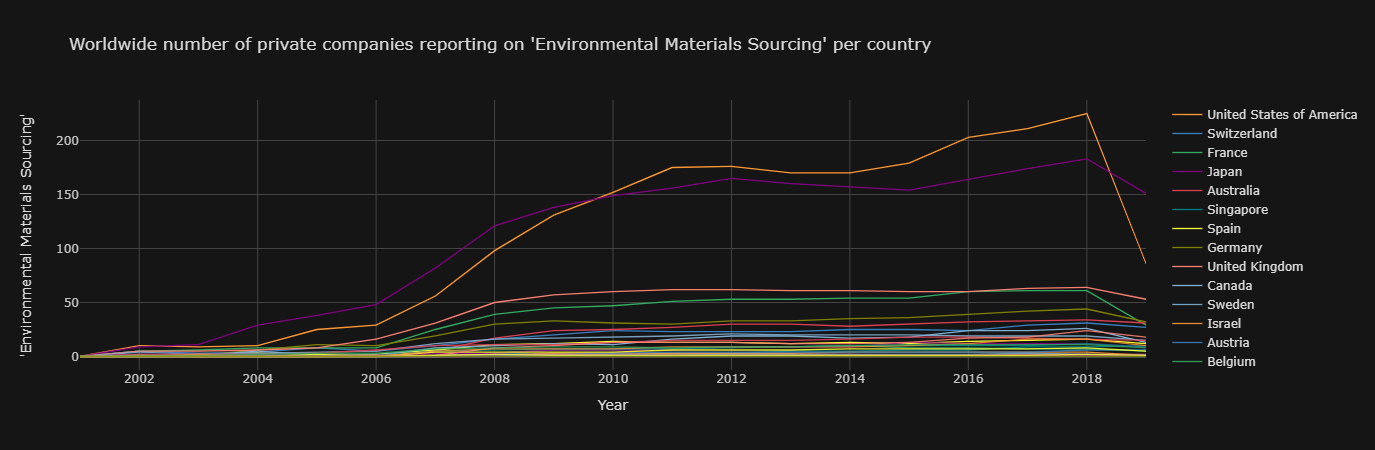

In [23]:
environmental_material_sourcing_df_countries.T.loc["2001":"2019"].iplot(title = "Worldwide number of private companies reporting on 'Environmental Materials Sourcing' per country",
                                                                        yaxis_title = "'Environmental Materials Sourcing'",
                                                                        xaxis_title = "Year",
                                                                        theme = "solar")

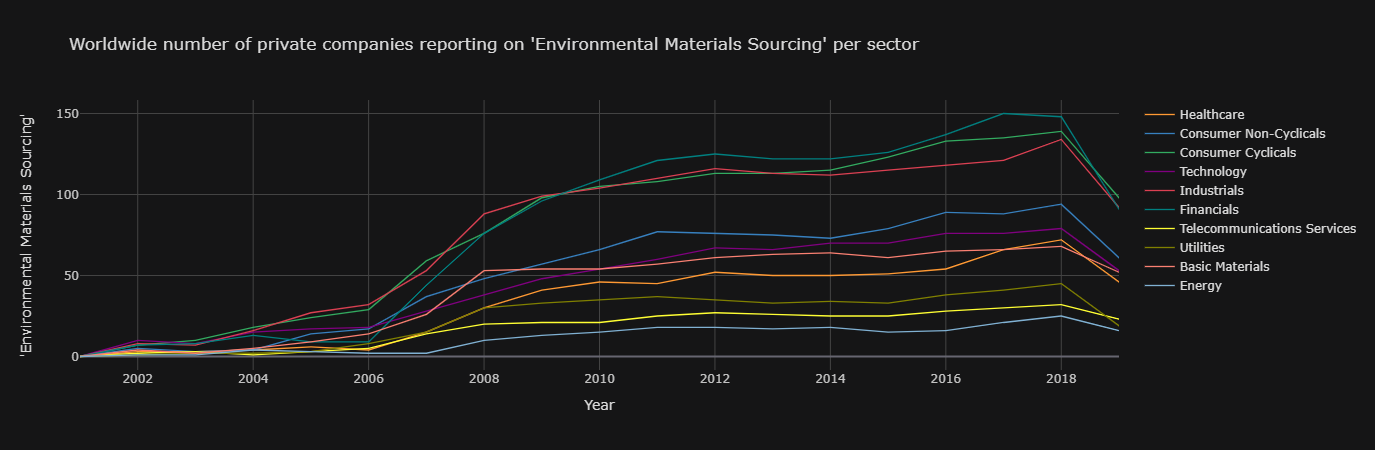

In [24]:
environmental_material_sourcing_df_sectors.T.loc["2001":"2019"].iplot(title = "Worldwide number of private companies reporting on 'Environmental Materials Sourcing' per sector",
                                                                      yaxis_title = "'Environmental Materials Sourcing'",
                                                                      xaxis_title = "Year",
                                                                      theme = "solar")

To get a better wholeistic picture of our data this far, we can graph it [else-how](https://stackoverflow.com/questions/55220380/plotly-add-line-to-bar-chart/62843197#62843197):

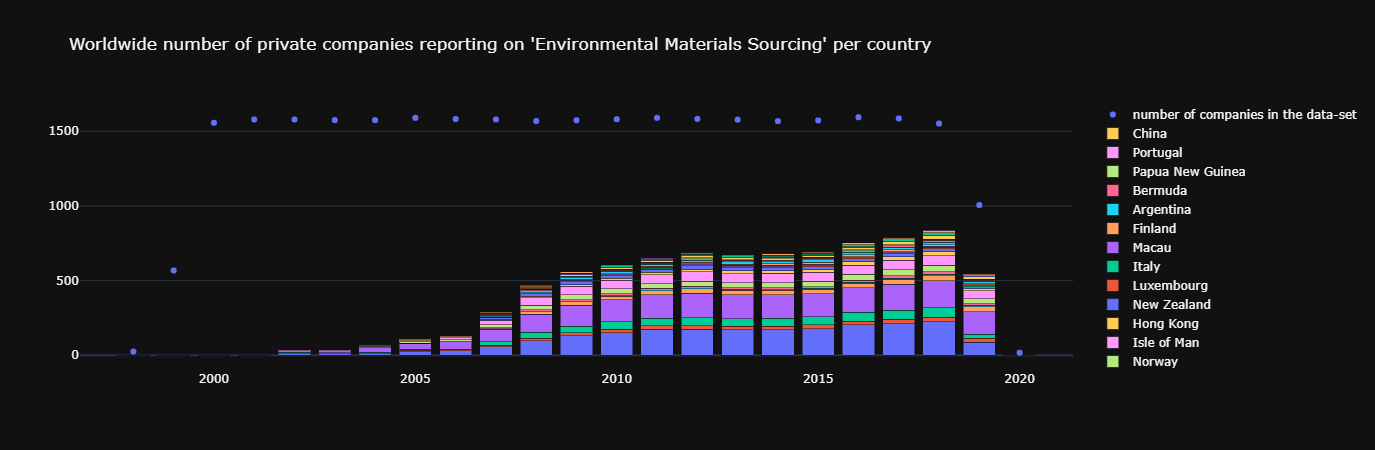

In [25]:
data = []
for country in environmental_material_sourcing_df_countries.index:
    data.append(
        plotly.graph_objs.Bar(
            name = country,
            x = list(environmental_material_sourcing_df_countries.columns),
            y = list(environmental_material_sourcing_df_countries.T[country])
        )
    )

data.append(
    plotly.graph_objs.Scatter(
        name = "number of companies in the data-set",
        x = list(environmental_material_sourcing_df_countries.columns),
        y = list([total_environmental_material_sourcing_df.values[0][i] for i in range(len(total_environmental_material_sourcing_df.values[0]))]),
        mode='markers'
    )
)


layout = plotly.graph_objs.Layout(
    barmode = 'stack',
    title = "Worldwide number of private companies reporting on 'Environmental Materials Sourcing' per country"
)

fig = plotly.graph_objs.Figure(data=data, layout=layout)

fig.layout.template = "plotly_dark"

# IPython notebook
iplot(fig, filename='pandas-bar-chart-layout')

Save our data in an excel Workbook, call it 'ESG_data'

In [26]:
# ' ExcelWriter ' is needed to create an Excel Workbook with multiple tabs/sheets
with pandas.ExcelWriter("ESG_data.xlsx") as writer:
    df.to_excel(writer, sheet_name = "df")
    environmental_material_sourcing_df_countries.to_excel(writer, sheet_name = "env_mat_sourcing_df_countries")
    environmental_material_sourcing_df_sectors.to_excel(writer, sheet_name = "env_mat_sourcing_df_sectors")
    total_environmental_material_sourcing_df.to_excel(writer, sheet_name = "tot_env_mat_sourcing_df")

#### Generalising the graphs per country and sector

Above we saw data gathered in real terms, but we can calculate a percentage of all companies supplying such data (such as 'Environmental Materials Sourcing'). The function bellow allows its user to do just that with the variable 'Percent'.

In [27]:
def Stacked_Bar_Graph(Countries, df_Countries,
                      Total_df, _field_name,
                      Color_theme = "plotly_dark"):
    data = []
    for country in Countries:
        data.append(plotly.graph_objs.Bar(name = country,
                                          x = list(df_Countries.columns),
                                          y = list(df_Countries.T[country])))
    data.append(plotly.graph_objs.Scatter(name = "number of companies in the data-set",
                                          x = list(df_Countries.columns),
                                          y = list([Total_df.values[0][i] for i in range(len(Total_df.values[0]))]),
                                          mode='markers'))
    layout = plotly.graph_objs.Layout(barmode = 'stack',
                                      title = str("Worldwide number of private companies reporting on " + _field_name + " per country"))
    fig = plotly.graph_objs.Figure(data = data, layout = layout)
    fig.update_layout(xaxis_title="Years",
                      yaxis_title=_field_name)
    fig.layout.template = Color_theme
    iplot(fig, filename = 'pandas-bar-chart-layout')

In [28]:
def ESGAggregated(Companies = ['0#.MIWO00000PUS'],
                  Fields = ['TR.AnalyticEnvControv', 'TR.EnvMaterialsSourcing', 'TR.EnvSupplyChainMgt', 'TR.PolicySustainablePackaging'],
                  SDate = '0', EDate = '-19', Period = 'FY0', Frq = 'FY',
                  Percent = True,
                  Per_country = True, Per_sector = True,
                  Line_graph = True, Line_graph_theme = 'solar',
                  Stacked_bar_graph = True, Stacked_bar_graph_theme = 'plotly_dark',
                  Start_graph_year = 2000, End_graph_year = 2019,
                  save_excel = True):
    
    """
    This function will output datasets and line graphs of the sum of 'true' values per year for each country and sector among the lit of companies defined in ' Companies '.
    It provides a list of lists of lists.
    The 1st list: switches between Country or Sector
    The 2nd: switches between 'Environmental Controversies' or 'Environmental Materials Sourcing'
    The 3rd: switches between the title/selection name, the (pandas) data-frame and the Pyplot.
    
    Companies (list of strings): list of the instrument RICs (Refinitiv Instrument Codes) defining the companies to look at.
    Defaulted to: ['0#.MIWO00000PUS'].
    
    Fields (list of strings): List of the fields wanted from Refinitiv in our informatics.
    Defaulted to: ['TR.AnalyticEnvControv', 'TR.EnvMaterialsSourcing', 'TR.EnvSupplyChainMgt', 'PolicySustainablePackaging'].
    
    SDate, EDate, Period, and Frq are string variables defining specifications of the data being retrieved from Refinitiv.
    Defaulted to: SDate = '0', EDate = '-19', Period = 'FY0', and Frq = 'FY'.
    
    Percent (boolean): If True, it normalises the aggregated data to % of the sum of reported figures (i.e.: the sum of 'True' and 'False').
    Defaulted to: True.
    
    Per_country (boolean): If True, returns data asked for aggregated on a 'per country' basis. Defaulted to: True.
    
    Per_sector (boolean): If True, returns data asked for aggregated on a 'per sector' basis. Defaulted to: True.
    
    Display (boolean): If True, returns data asked for in a Pyplot line graph. Defaulted to: True.
    
    Start_graph_year (int/str): The start year when user wishes the Pyplot line graph to start. Defaulted to: 2000.
    
    End_graph_year (int/str): The end year when user wishes the Pyplot line graph to start. Defaulted to: 2019.
    """
    
    # First: create a list with the fields asking for the country and sector of each company requested.
    # This list is to appended with the list of companies to request info. for.
    _Fields = ['TR.HeadquartersCountry', 'TR.TRBCEconomicSector']
    for i in Fields:
        _Fields.append(i + ".date") # Collect the date for this data point
        _Fields.append(i) # We obviously want the data point in question
    
    # Collect data from Refinitiv
    df, err = ek.get_data(instruments = Companies,
                          fields = _Fields,
                          parameters = {'SDate':SDate,
                                        'EDate':EDate,
                                        'Period':Period,
                                        'Frq':Frq})
    
    # Collect the name of the fields we are interested in:
    Fields_Names = list(df.iloc[:,[3 + 2*i + 1 for i in range(int((len(_Fields) - 2)/2))]].columns)
    
    # Now we will populate every 'Country of Headquarters' and 'TRBC Economic Sector Name' column in our newly defined 'df' pandas data-frame
    for i in range(len(df.index)):
        if df["Country of Headquarters"][i] == "":
            df.iloc[i]["Country of Headquarters"] = str(df["Country of Headquarters"][i-1])
        if df["TRBC Economic Sector Name"][i] == "":
            df.iloc[i]["TRBC Economic Sector Name"] = str(df["TRBC Economic Sector Name"][i-1])
    
    # Construct a straight-forward 'Years' column
    df_years = []
    # the following if statement is there to account for any empty values in the "Date" df column
    for i in range(len(df.index)):
        if str(df["Date"].iloc[:,0][i])[:4] == "":
            df_years.append(numpy.nan)
        else:
            df_years.append(int(str(df["Date"].iloc[:,0][i])[:4]))
    df["Years"] = df_years
    
    # Make a Python variable containing all the countries we saw this far
    countries = df["Country of Headquarters"].unique()
    
    # Make a Python variable containing all the sectors we saw this far
    sectors = df["TRBC Economic Sector Name"].unique()
    
    # Make a Python variable containing all the years in our data-frame
    years = [str(i)[:4] for i in df["Date"].iloc[:,0]]
    years = numpy.unique(numpy.array(years))[1:].astype(numpy.int) # The 0th value is an empty string
    
    if save_excel == True:
        # ' ExcelWriter ' is needed to create an Excel Workbook with multiple tabs/sheets
        writer = pandas.ExcelWriter("ESGAggregated.xlsx", engine = 'xlsxwriter')
        df.to_excel(writer, sheet_name = "df")
    
    # Aggregate data on a per-country basis
    df_countries_list = []
    if Per_country == True:
        for field_name, field in zip(Fields_Names, Fields):
            
            df_countries = pandas.DataFrame(index = countries)
            for year in years:
                if Percent == True:
                    lis = [len(df[df["Country of Headquarters"] == country][df["Years"] == year][df[field_name] == "True"])/max(1,(len(df[df["Country of Headquarters"] == country][df["Years"] == year][df[field_name] == "True"]) + len(df[df["Country of Headquarters"] == country][df["Years"] == year][df[field_name] == "False"]))) for country in countries]
                else:
                    lis = [len(df[df["Country of Headquarters"] == country][df["Years"] == year][df[field_name] == "True"]) for country in countries]
                df_countries[str(year)] = lis
            
            # 1st the straight-forward line graphs:
            if Line_graph == True:
                graph = df_countries.T.loc[str(Start_graph_year):str(End_graph_year)].iplot(title = "Ratio of private companies with " + field_name + " per country (out of all companies reporting this data)",
                                                                                            yaxis_title = field_name,
                                                                                            xaxis_title = "Year",
                                                                                            theme = Line_graph_theme)
                display(graph)
            # 2nd: the stacked bar graphs:
            if Stacked_bar_graph == True:
                total_df = pandas.DataFrame(index = ["Number of companies in the data-set"])
                df_countries2 = pandas.DataFrame(index = countries)
                for year in years:
                    lis = len(df[df["Years"] == year])
                    total_df[str(year)] = lis
                    lis2 = [len(df[df["Country of Headquarters"] == country][df["Years"] == year][df[field_name] == "True"]) for country in countries]
                    df_countries2[str(year)] = lis2
                stacked_bar_graph = Stacked_Bar_Graph(Countries = countries,
                                                      df_Countries = df_countries2,
                                                      Total_df = total_df,
                                                      _field_name = field_name,
                                                      Color_theme = Stacked_bar_graph_theme)
                display(stacked_bar_graph)
                
            df_countries_list.append([str("Aggregate data on a per-COUNTRY basis for " + field_name),
                                      df_countries,
                                      graph])
            
            if save_excel == True:
                df_countries.to_excel(writer, sheet_name =  (field.replace("TR.", "")[0:21] + "_df_count"))
    
    # Aggregate data on a per-sector basis
    df_sectors_list = [] # list to be populated. The reason it is there (as opposed to after the ' if Per_sector == True: ' line) is that if the user of this function chose not to include sectors, inserting ' df_sectors_list ' at this point will output an empty list, which is appropriate.
    if Per_sector == True: # This if statement regulates for the user choosing (or not choosing) to aggregate data on a 'per-sector' basis.
        for field_name, field in zip(Fields_Names, Fields):
            
            df_sectors = pandas.DataFrame(index = sectors)
            for year in years:
                if Percent == True:
                    lis = [len(df[df["TRBC Economic Sector Name"] == sector][df["Years"] == year][df[field_name] == "True"])/max(1,(len(df[df["TRBC Economic Sector Name"] == sector][df["Years"] == year][df[field_name] == "True"]) + len(df[df["TRBC Economic Sector Name"] == sector][df["Years"] == year][df[field_name] == "False"]))) for sector in sectors]
                else:
                    lis = [len(df[df["TRBC Economic Sector Name"] == sector][df["Years"] == year][df[field_name] == "True"]) for sector in sectors]
                df_sectors[str(year)] = lis
            
            if Line_graph == True:
                graph = df_sectors.T.loc[str(Start_graph_year):str(End_graph_year)].iplot(title = "Ratio of private companies with " + field_name + " per sector (out of all companies reporting this data)",
                                                                                          yaxis_title = field_name,
                                                                                          xaxis_title = "Year",
                                                                                          theme = Line_graph_theme)
                display(graph)
            df_sectors_list.append([str("Aggregate data on a per-SECTOR basis for " + field_name),
                                    df_sectors,
                                    graph])
            
            if save_excel == True:
                df_sectors.to_excel(writer, sheet_name = field.replace("TR.", "")[0:23] + "_df_sec")
                writer.save()
                writer.close()
    
    return(df_countries_list,
           df_sectors_list,
           _Fields,
           df,
           Fields_Names,
           df_years,
           countries,
           sectors,
           years)

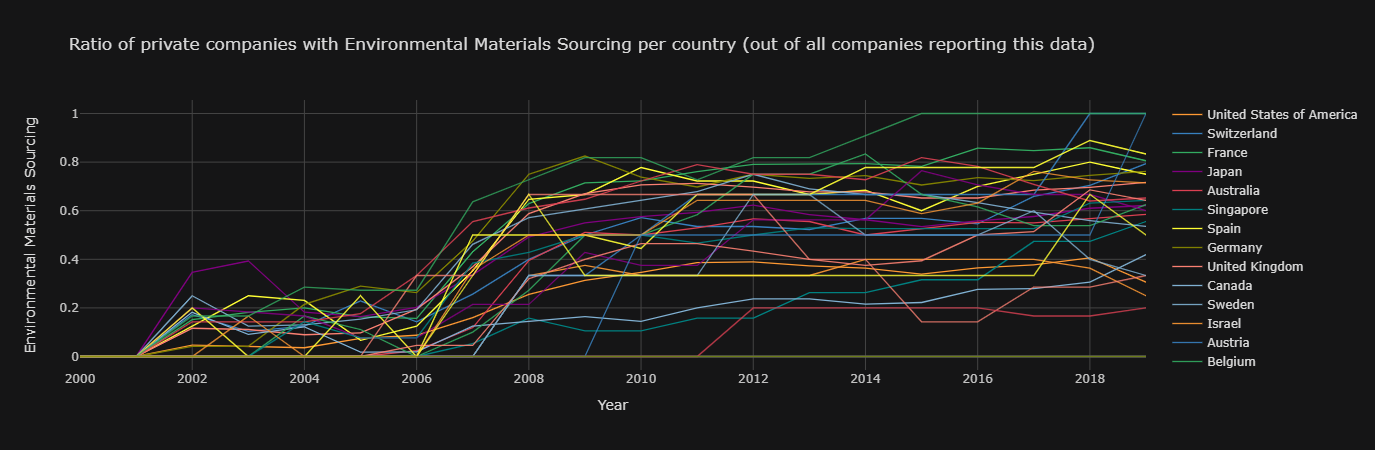

None

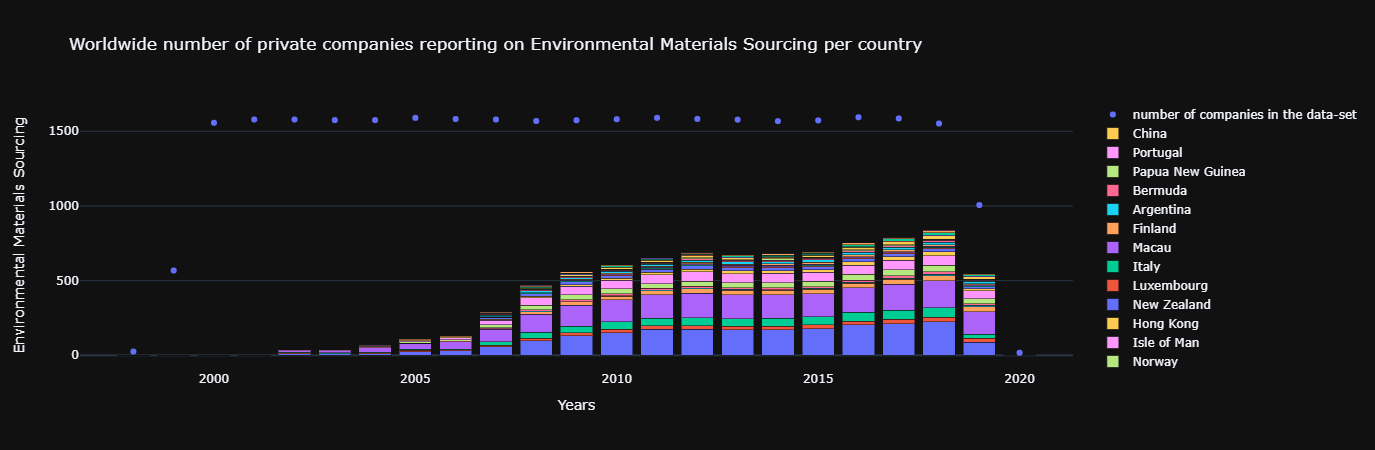

None

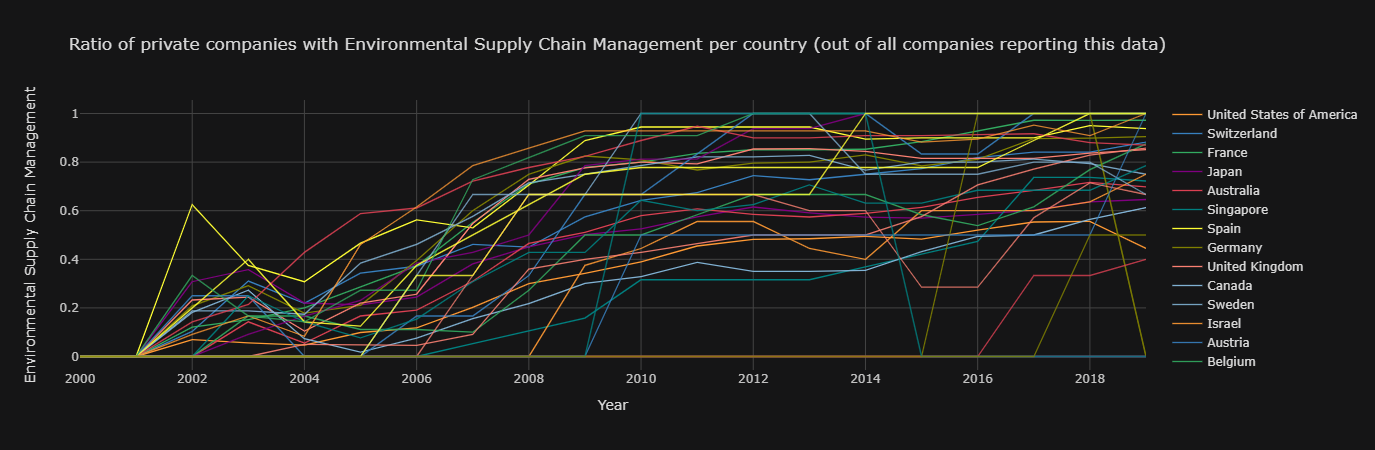

None

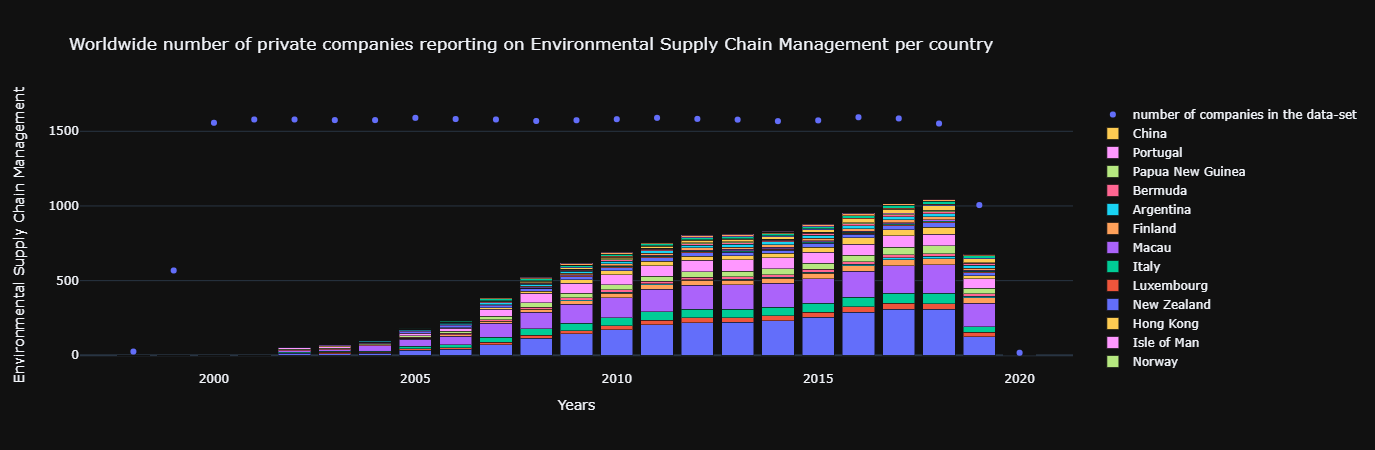

None

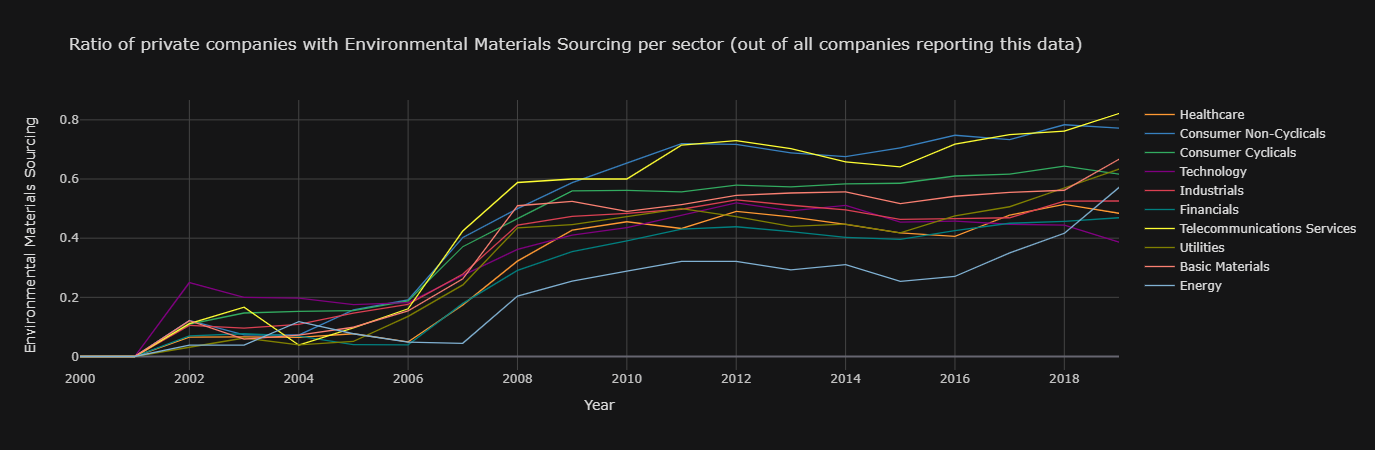

None

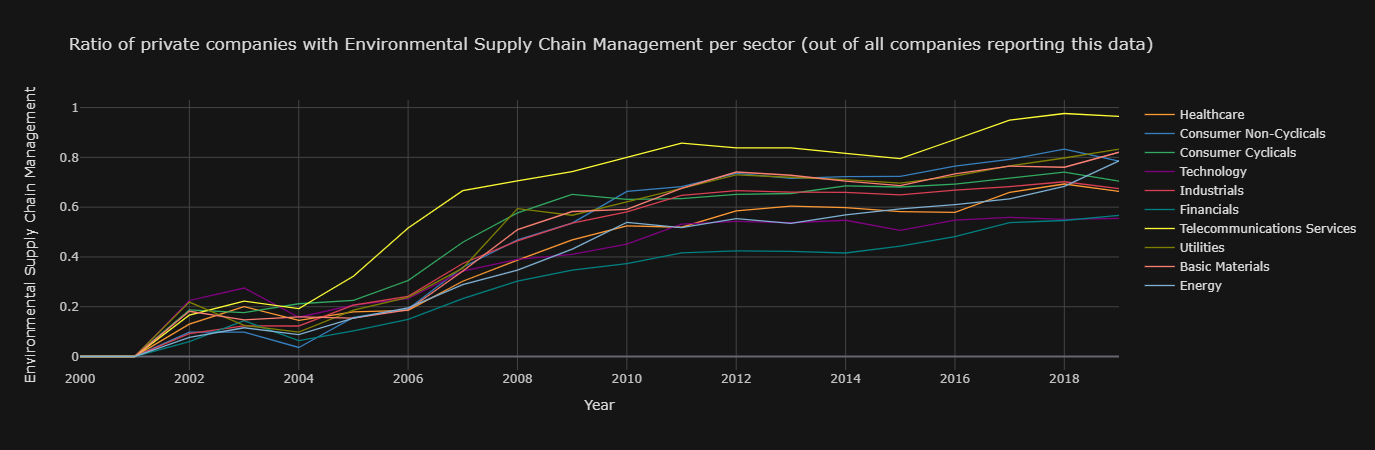

None

In [29]:
test1 = ESGAggregated(Companies = ['0#.MIWO00000PUS'],
                     Fields = ['TR.EnvMaterialsSourcing', 'TR.EnvSupplyChainMgt'],
                     SDate = '0', EDate = '-19', Period = 'FY0', Frq = 'FY',
                     Percent = True,
                     Per_country = True, Per_sector = True,
                     Line_graph = True, Stacked_bar_graph = True,
                     Start_graph_year = 2000, End_graph_year = 2019)

The 3rd element of the returned list (0 indexed) is the data-frame, let's have a look at it:

In [30]:
test1[3]

Instrument   Country of Headquarters TRBC Economic Sector Name  \
0          ZTS.N  United States of America                Healthcare   
1          ZTS.N  United States of America                Healthcare   
2          ZTS.N  United States of America                Healthcare   
3          ZTS.N  United States of America                Healthcare   
4          ZTS.N  United States of America                Healthcare   
...          ...                       ...                       ...   
31598   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
31599   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
31600   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
31601   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
31602   CARLb.CO                   Denmark    Consumer Non-Cyclicals   

                       Date Environmental Materials Sourcing  \
0      2018-12-31T00:00:00Z                             True   
1      2017-12-31T00:00:00Z                            False   
2      2016-12-31T00:00:00Z                            False   
3      2015-12-31T00:00:00Z                            False   
4      2014-12-31T00:00:00Z                            False   
...                     ...                              ...   
31598  2004-12-31T00:00:00Z                            False   
31599  2003-12-31T00:00:00Z                            False   
31600  2002-12-31T00:00:00Z                            False   
31601  2001-12-31T00:00:00Z                                    
31602  2000-12-31T00:00:00Z                                    

                       Date Environmental Supply Chain Management   Years  
0      2018-12-31T00:00:00Z                                  True  2018.0  
1      2017-12-31T00:00:00Z                                  True  2017.0  
2      2016-12-31T00:00:00Z                                  True  2016.0  
3      2015-12-31T00:00:00Z                                  True  2015.0  
4      2014-12-31T00:00:00Z                                  True  2014.0  
...                     ...                                   ...     ...  
31598  2004-12-31T00:00:00Z                                 False  2004.0  
31599  2003-12-31T00:00:00Z                                 False  2003.0  
31600  2002-12-31T00:00:00Z                                 False  2002.0  
31601  2001-12-31T00:00:00Z                                        2001.0  
31602  2000-12-31T00:00:00Z                                        2000.0  

[31603 rows x 8 columns]

1st: switches between Country or Sector <br>
2nd: switches between 'Environmental Controversies' or 'Environmental Materials Sourcing' <br>
3rd: switches between the title/selection name, the (pandas) data-frame and the Pyplot.

In [31]:
test1[0][0][0]

'Aggregate data on a per-COUNTRY basis for Environmental Materials Sourcing'

In [32]:
test1[1][0][0]

'Aggregate data on a per-SECTOR basis for Environmental Materials Sourcing'

In [33]:
test1[1][1][0]

'Aggregate data on a per-SECTOR basis for Environmental Supply Chain Management'

In [34]:
test1[1][1][1]

1998  1999  2000  2001      2002      2003  \
Healthcare                    0.0   0.0   0.0   0.0  0.130435  0.200000   
Consumer Non-Cyclicals        0.0   0.0   0.0   0.0  0.097561  0.097561   
Consumer Cyclicals            0.0   0.0   0.0   0.0  0.187500  0.176471   
Technology                    0.0   0.0   0.0   0.0  0.225000  0.275000   
Industrials                   0.0   0.0   0.0   0.0  0.092105  0.123288   
Financials                    0.0   0.0   0.0   0.0  0.060000  0.144231   
Telecommunications Services   0.0   0.0   0.0   0.0  0.166667  0.222222   
Utilities                     0.0   0.0   0.0   0.0  0.218750  0.125000   
Basic Materials               0.0   0.0   0.0   0.0  0.181818  0.147059   
Energy                        0.0   0.0   0.0   0.0  0.076923  0.115385   

                                 2004      2005      2006      2007      2008  \
Healthcare                   0.145161  0.179487  0.185185  0.302326  0.387097   
Consumer Non-Cyclicals       0.036364  0.157303  0.191011  0.358696  0.468750   
Consumer Cyclicals           0.211864  0.225806  0.305195  0.459119  0.576687   
Technology                   0.157895  0.206186  0.232323  0.343137  0.390476   
Industrials                  0.122449  0.206522  0.241758  0.373684  0.464646   
Financials                   0.063492  0.102679  0.149123  0.232653  0.302682   
Telecommunications Services  0.192308  0.322581  0.516129  0.666667  0.705882   
Utilities                    0.098039  0.186441  0.237288  0.354839  0.594203   
Basic Materials              0.159420  0.153846  0.186813  0.343434  0.509615   
Energy                       0.088235  0.153846  0.195122  0.288889  0.346939   

                                 2009      2010      2011      2012      2013  \
Healthcare                   0.468750  0.524752  0.519231  0.584906  0.603774   
Consumer Non-Cyclicals       0.536082  0.663366  0.682243  0.735849  0.715596   
Consumer Cyclicals           0.651429  0.631016  0.634021  0.651282  0.654822   
Technology                   0.410256  0.451613  0.531746  0.542636  0.537313   
Industrials                  0.535885  0.581395  0.647059  0.666667  0.660633   
Financials                   0.346863  0.372760  0.416370  0.424561  0.422145   
Telecommunications Services  0.742857  0.800000  0.857143  0.837838  0.837838   
Utilities                    0.567568  0.621622  0.675676  0.729730  0.720000   
Basic Materials              0.582524  0.590909  0.675676  0.741071  0.728070   
Energy                       0.431373  0.538462  0.517857  0.553571  0.534483   

                                 2014      2015      2016      2017      2018  \
Healthcare                   0.598214  0.581967  0.578947  0.659420  0.692857   
Consumer Non-Cyclicals       0.722222  0.723214  0.764706  0.791667  0.833333   
Consumer Cyclicals           0.685279  0.680952  0.692661  0.716895  0.740741   
Technology                   0.547445  0.506494  0.548193  0.558824  0.550562   
Industrials                  0.659292  0.649194  0.667984  0.682171  0.701961   
Financials                   0.415842  0.443396  0.481366  0.537538  0.546296   
Telecommunications Services  0.815789  0.794872  0.871795  0.950000  0.976190   
Utilities                    0.710526  0.696203  0.725000  0.765432  0.797468   
Basic Materials              0.704348  0.686441  0.733333  0.764706  0.760331   
Energy                       0.568966  0.593220  0.610169  0.633333  0.683333   

                                 2019      2020  
Healthcare                   0.663158  0.000000  
Consumer Non-Cyclicals       0.784810  0.000000  
Consumer Cyclicals           0.704403  0.800000  
Technology                   0.554745  0.285714  
Industrials                  0.674286  1.000000  
Financials                   0.567010  1.000000  
Telecommunications Services  0.964286  0.000000  
Utilities                    0.833333  0.000000  
Basic Materials              0.820513  0.000000  
Energy                     

$$ \\ $$
$$ \\ $$

# **Creating a Python Class**

To make this as useful as possible (and to build a more intuitive session for users of our functionalities), the class bellow allows anyone to pick and choose the functions and graphs they want (as well as saving an excel workbook with the produced and 'cleaned' data.

In [45]:
class ESG_Boolean_Data():
    """ ESG_Boolean_Data Python Class Version 1.0:
    This Python class allows its user to aggregate ESG Boolean Data (i.e.: Data that is 'False' or 'True') for private companies within Refinitiv's data-set on a per-country or per-sector basis.
    It runs its own function ' get_data ' by default; it collects and 'completes' the data.
    It (i.e.: the ' __init__ ' of ' ESG_Boolean_Data ') takes the following arguments:
    
    Companies (list of strings): list of the instrument RICs (Refinitiv Instrument Codes) defining the companies to look at.
    Defaulted to: ['0#.MIWO00000PUS']. 'MIWO00000PUS' is the Refinitiv Identifier Code (RIC) for the MSCI World Index in USD.

    Fields (list of strings): List of the fields wanted from Refinitiv in our informatics.
    Defaulted to: ['TR.AnalyticEnvControv', 'TR.EnvMaterialsSourcing', 'TR.EnvSupplyChainMgt', 'PolicySustainablePackaging'].
    
    SDate, EDate, Period, and Frq are string variables defining specifications of the data being retrieved from Refinitiv.
    Defaulted to: SDate = '0', EDate = '-19', Period = 'FY0', and Frq = 'FY'.
    
    save_excel (boolean): If True, it will save an Excel workbook named 'ESG_Boolean_Data.xlsx' in the location where this script is being run.
    Defaulted to: save_excel = False.
    
    
    Attributes:
    self.companies: returns a list of the companies asked for.
    self.fields: returns a list of the companies' RIC (Refinitiv Identification Codes) asked for.
    self.SDate: returns the Start Date (SDate) asked for.
    self.EDate: returns the End Date (EDate) asked for.
    self.period: returns the period asked for.
    self.frq: returns the frequency asked for.
    self.fields: returns a list of the fields asked for.
    self.field_names: returns a list of the fields asked for's names.
    self.df: returns the most complete / raw / wholesome data-frame.
    self.countries: returns a list of the countries in which the head-quarters of the companies asked for reside.
    self.sectors: returns a list of the sectors of all companies asked for.
    self.years: returns a list of the years for which data was collected.
    """

    def __init__(self,
                 Companies = ['0#.MIWO00000PUS'],
                 Fields = ['TR.AnalyticEnvControv',
                           'TR.EnvMaterialsSourcing',
                           'TR.EnvSupplyChainMgt',
                           'TR.PolicySustainablePackaging'],
                 SDate = '0', EDate = '-19', Period = 'FY0', Frq = 'FY',
                 save_excel = False):
        
        ## Set all attributes:
        self.companies = Companies
        self.fields = Companies
        self.SDate = SDate
        self.EDate = EDate
        self.period = Period
        self.frq = Frq
        
        # Collect data and 'complete' it:
        self.get_data(Companies = Companies, Fields = Fields, save_excel = save_excel,
                      SDate = SDate, EDate = EDate, Period = Period, Frq = Frq)
        
    def get_data(self,
                 Companies = ['0#.MIWO00000PUS'],
                 Fields = ['TR.AnalyticEnvControv',
                           'TR.EnvMaterialsSourcing',
                           'TR.EnvSupplyChainMgt',
                           'TR.PolicySustainablePackaging'],
                 SDate = '0', EDate = '-19', Period = 'FY0', Frq = 'FY',
                 save_excel = False):
        
        """ESG_Boolean_Data().get_data() collects data via refinitiv's eikon API and 'completes' it (filling in empty sector and country fields)

        Companies (list of strings): list of the instrument RICs (Refinitiv Instrument Codes) defining the companies to look at.
        Defaulted to: ['0#.MIWO00000PUS']. 'MIWO00000PUS' is the Refinitiv Identifier Code (RIC) for the MSCI World Index in USD.

        Fields (list of strings): List of the fields wanted from Refinitiv in our informatics.
        Defaulted to: ['TR.AnalyticEnvControv', 'TR.EnvMaterialsSourcing', 'TR.EnvSupplyChainMgt', 'PolicySustainablePackaging'].

        SDate, EDate, Period, and Frq are string variables defining specifications of the data being retrieved from Refinitiv.
        Defaulted to: SDate = '0', EDate = '-19', Period = 'FY0', and Frq = 'FY'.

        save_excel (boolean): If True, it will save an Excel workbook named 'ESG_Boolean_Data.xlsx' in the location where this script is being run.
        Defaulted to: save_excel = False.
        
        
        Attributes:
        self.fields: returns a list of the fields asked for.
        self.field_names: returns a list of the fields asked for's names.
        self.df: returns the most complete / raw / wholesome data-frame.
        self.countries: returns a list of the countries in which the head-quarters of the companies asked for reside.
        self.sectors: returns a list of the sectors of all companies asked for.
        self.years: returns a list of the years for which data was collected.
        """
        
        # First: create a list with the fields asking for the country and sector of each company requested.
        # This list is to appended with the list of companies to request info. for.
        _Fields = ['TR.HeadquartersCountry',
                   'TR.TRBCEconomicSector']
        for i in Fields:
            _Fields.append(i + ".date") # Collect the date for this data point
            _Fields.append(i) # We obviously want the data point in question

        # Collect data from Refinitiv
        df, err = ek.get_data(instruments = Companies,
                              fields = _Fields,
                              parameters = {'SDate' : self.SDate,
                                            'EDate' : self.EDate,
                                            'Period' : self.period,
                                            'Frq' : self.frq})
        
        
        # Collect the name of the fields we are interested in:
        Fields_Names = list(df.iloc[:,[3 + 2*i + 1 for i in range(int((len(_Fields) - 2)/2))]].columns)

        # Now we will populate every 'Country of Headquarters' and 'TRBC Economic Sector Name' column in our newly defined 'df' pandas data-frame
        for i in range(len(df.index)):
            if df["Country of Headquarters"][i] == "":
                df.iloc[i]["Country of Headquarters"] = str(df["Country of Headquarters"][i-1])
            if df["TRBC Economic Sector Name"][i] == "":
                df.iloc[i]["TRBC Economic Sector Name"] = str(df["TRBC Economic Sector Name"][i-1])

        # Construct a straight-forward 'Years' column
        df_years = []
        # the following if statement is there to account for any empty values in the "Date" df column
        for i in range(len(df.index)):
            if str(df["Date"].iloc[:,0][i])[:4] == "":
                df_years.append(numpy.nan)
            else:
                df_years.append(int(str(df["Date"].iloc[:,0][i])[:4]))
        df["Years"] = df_years

        # Make a Python variable containing all the countries we saw this far
        countries = df["Country of Headquarters"].unique()

        # Make a Python variable containing all the sectors we saw this far
        sectors = df["TRBC Economic Sector Name"].unique()

        # Make a Python variable containing all the years in our data-frame
        years = [str(i)[:4] for i in df["Date"].iloc[:,0]]
        years = numpy.unique(numpy.array(years))[1:].astype(numpy.int) # The 0th value is an empty string

        if save_excel == True:
            # ' ExcelWriter ' is needed to create an Excel Workbook with multiple tabs/sheets
            writer = pandas.ExcelWriter("ESG_Boolean_Data.xlsx", engine = 'xlsxwriter')
            df.to_excel(writer, sheet_name = "df")
            writer.save()
            writer.close()
        
        
        ## Set more attributes:
        self.fields = _Fields
        self.field_names = Fields_Names
        self.df = df
        self.countries = countries
        self.sectors = sectors
        self.years = years
        
        return self
   
    
    def Aggregate_Per_Country_Line_Graph(self,
                                         Percent = True,
                                         Line_graph_theme = 'solar',
                                         Start_graph_year = 2000,
                                         End_graph_year = 2019,
                                         save_excel = False):
        """ESG_Boolean_Data().Aggregate_Per_Country_Line_Graph() aggregates the data on a per-country basis for each year and returns a plotly line graph.

        Percent (boolean): If 'True', will return data as a ratio (i.e.: percentage) of the total number of companies in the data-set. 'False' will return the actual number of companies in question.
        Defaulted to: True
        
        Line_graph_theme (str): defines the theme of the 'outputed' line graph
        Defaulted as: Line_graph_theme = 'solar'.
        Available templates: 'pearl', 'white', 'ggplot', 'solar', 'space'.
         
         
        Start_graph_year (int): start year of the graph outputed.
        Defaulted as: 2000.
        
        
        End_graph_year (int): end year of the graph outputed.
        Defaulted as: 2019.

        save_excel (boolean): If True, it will save an Excel workbook named 'ESGAggregated.xlsx' in the location where this script is being run. If an Excel workbook named 'ESGAggregated.xlsx' already exists, it will add sheets to the existing one.
        Defaulted to: save_excel = False.
        
        
        Attributes:
        self.df_countries_list: returns a list of all the data-frames constructed (each one aggregating data on a per-country basis for each year).
        """
        
        df = self.df
        df_countries_list = []
        for field_name, field in zip(self.field_names, self.fields):

            df_countries = pandas.DataFrame(index = self.countries)
            for year in self.years:
                if Percent == True:
                    lis = [len(df[df["Country of Headquarters"] == country][df["Years"] == year][df[field_name] == "True"])/
                           max(1,(len(df[df["Country of Headquarters"] == country][df["Years"] == year][df[field_name] == "True"]) +
                                  len(df[df["Country of Headquarters"] == country][df["Years"] == year][df[field_name] == "False"]))
                              ) for country in self.countries]
                else:
                    lis = [len(df[df["Country of Headquarters"] == country][df["Years"] == year][df[field_name] == "True"]
                              ) for country in self.countries]
                df_countries[str(year)] = lis
            
            if Percent == True:
                title = str("Ratio of private companies with " + field_name +
                            " per country (out of all companies reporting this data)")
            else:
                title = str("Number of private companies with " + field_name +
                            " per country (out of all companies reporting this data)")
            
            display(graph = df_countries.T.loc[str(Start_graph_year):str(End_graph_year)].iplot(title = title,
                                                                                                yaxis_title = field_name,
                                                                                                xaxis_title = "Year",
                                                                                                theme = Line_graph_theme))
            
            columns = pandas.MultiIndex.from_product([[str("Aggregate data on a per-COUNTRY basis for " + field_name)],
                                                      list(df_countries.columns)],
                                                     names = ['', 'Year'])
            df_countries = pandas.DataFrame(df_countries.values, index = df_countries.index, columns = columns)
            
            display(df_countries)
            
            df_countries_list.append(df_countries)
            
            if save_excel == True:
            # ' ExcelWriter ' is needed to create an Excel Workbook with multiple tabs/sheets
                if os.path.isfile("ESGAggregated.xlsx"):
                    writer = pandas.ExcelWriter("ESGAggregated.xlsx", engine = 'openpyxl')
                    writer.book = openpyxl.load_workbook("ESGAggregated.xlsx")
                else:
                    writer = pandas.ExcelWriter("ESGAggregated.xlsx", engine = 'xlsxwriter')
                df_countries.to_excel(writer, sheet_name = (field.replace("TR.", "")[0:21] + "_df_count"))
                writer.save()
                writer.close()
        
        self.df_countries_list = df_countries_list
        
        return self
    
    
    def Aggregate_Per_Sector_Line_Graph(self,
                                        Percent = True,
                                        Line_graph_theme = 'solar',
                                        Start_graph_year = 2000,
                                        End_graph_year = 2019,
                                        save_excel = False):
        """ESG_Boolean_Data().Aggregate_Per_Sector_Line_Graph() aggregates the data on a per-sector basis for each year and returns a plotly line graph.

        Percent (boolean): If 'True', will return data as a ratio (i.e.: percentage) of the total number of companies in the data-set. 'False' will return the actual number of companies in question.
        Defaulted to: True
        
        Line_graph_theme (str): defines the theme of the 'outputed' line graph
        Defaulted as: Line_graph_theme = 'solar'.
        Available templates: 'pearl', 'white', 'ggplot', 'solar', 'space'.
         
         
        Start_graph_year (int): start year of the graph outputed.
        Defaulted as: 2000.
        
        
        End_graph_year (int): end year of the graph outputed.
        Defaulted as: 2019.

        save_excel (boolean): If True, it will save an Excel workbook named 'ESGAggregated.xlsx' in the location where this script is being run. If an Excel workbook named 'ESGAggregated.xlsx' already exists, it will add sheets to the existing one.
        Defaulted to: save_excel = False.
        
        Attributes:
        self.df_sectors_list: returns a list of all the data-frames constructed (each one aggregating data on a per-sector basis for each year).
        """
        
        
        df = self.df
        df_sectors_list = []
        for field_name, field in zip(self.field_names, self.fields):

            df_sectors = pandas.DataFrame(index = self.sectors)
            for year in self.years:
                if Percent == True:
                    lis = [len(df[df["TRBC Economic Sector Name"] == sector][df["Years"] == year][df[field_name] == "True"])/
                           max(1,(len(df[df["TRBC Economic Sector Name"] == sector][df["Years"] == year][df[field_name] == "True"]) +
                                  len(df[df["TRBC Economic Sector Name"] == sector][df["Years"] == year][df[field_name] == "False"]))
                              ) for sector in self.sectors]
                else:
                    lis = [len(df[df["TRBC Economic Sector Name"] == sector][df["Years"] == year][df[field_name] == "True"]
                              ) for sector in self.sectors]
                df_sectors[str(year)] = lis
            
            if Percent == True:
                title = str("Ratio of private companies with " + field_name +
                            " per sector (out of all companies reporting this data)")
            else:
                title = str("Number of private companies with " + field_name +
                            " per sector (out of all companies reporting this data)")
            
            display(graph = df_sectors.T.loc[str(Start_graph_year):str(End_graph_year)].iplot(title = title,
                                                                                              yaxis_title = field_name,
                                                                                              xaxis_title = "Year",
                                                                                              theme = Line_graph_theme))
            
            columns = pandas.MultiIndex.from_product([[str("Aggregate data on a per-SECTOR basis for " + field_name)],
                                                      list(df_sectors.columns)],
                                                     names=['', 'Year'])
            df_sectors = pandas.DataFrame(df_sectors.values, index = df_sectors.index, columns = columns)
            display(df_sectors)
            
            df_sectors_list.append(df_sectors)
            
            if save_excel == True:
            # ' ExcelWriter ' is needed to create an Excel Workbook with multiple tabs/sheets
                if os.path.isfile("ESGAggregated.xlsx"):
                    writer = pandas.ExcelWriter("ESGAggregated.xlsx", engine = 'openpyxl')
                    writer.book = openpyxl.load_workbook("ESGAggregated.xlsx")
                else:
                    writer = pandas.ExcelWriter("ESGAggregated.xlsx", engine = 'xlsxwriter')
                df_sectors.to_excel(writer, sheet_name = (field.replace("TR.", "")[0:21] + "_df_secto"))
                writer.save()
                writer.close()
        
        self.df_sectors_list = df_sectors_list
        
        return self
    

    def Stacked_Bar_Graph(self, df_Countries,
                          Total_df, _field_name,
                          Total_no_in_data_set = True,
                          Color_theme = "plotly_dark"):
        """ESG_Boolean_Data().Stacked_Bar_Graph() returns a stacked bar (and a point) graph.

        df_Countries (pandas data-frame): data per year on a per-country basis as per ESG_Boolean_Data.Aggregate_Per_Country_Stacked_Bar's df_countries2 (i.e.: with only one header column, not multi-indexed)
        
        Total_df (pandas data-frame): total number of companies per year.
        
        _field_name (list): list of the fields asked for.
        
        Total_no_in_data_set (boolean): if 'True', returns a point graph of the total number of companies in the selection asked for superimposed on the stacked bar-graph.
        Defaulted to: Total_no_in_data_set = True.
        
        Color_theme (str): defines the theme of the 'outputed' line graph.
        Defaulted as: Color_theme = 'plotly_dark'.
        Available templates: 'ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark', 'presentation', 'xgridoff', 'ygridoff', 'gridon', 'none'.
        
        save_excel (boolean): If True, it will save an Excel workbook named 'ESGAggregated.xlsx' in the location where this script is being run. If an Excel workbook named 'ESGAggregated.xlsx' already exists, it will add sheets to the existing one.
        Defaulted to: save_excel = False.
        """
        
        df = self.df
        
        data = []
        for country in self.countries:
            data.append(plotly.graph_objs.Bar(name = country,
                                              x = list(df_Countries.columns),
                                              y = list(df_Countries.T[country])))
        
        if Total_no_in_data_set == True:
            data.append(plotly.graph_objs.Scatter(name = "number of companies in the data-set",
                                                  x = list(df_Countries.columns),
                                                  y = list([Total_df.values[0][i] for i in range(len(Total_df.values[0]))]),
                                                  mode = 'markers'))
        
        layout = plotly.graph_objs.Layout(barmode = 'stack',
                                          title = str("Worldwide number of private companies reporting on " + _field_name + " per country"))
        
        fig = plotly.graph_objs.Figure(data = data, layout = layout)
        fig.update_layout(xaxis_title="Years",
                          yaxis_title=_field_name)
        fig.layout.template = Color_theme
        iplot(fig, filename = 'pandas-bar-chart-layout')
    
    
    def Aggregate_Per_Country_Stacked_Bar(self,
                                          Stacked_bar_graph_theme = "plotly_dark",
                                          Total_number_in_data_set = True,
                                          save_excel = False):
        """ESG_Boolean_Data().Aggregate_Per_Country_Stacked_Bar() aggregates data on a per-country basis and outputs a stacked bar-graph.
        
        Stacked_bar_graph_theme (str): defines the theme of the 'outputed' line graph.
        Defaulted as: Stacked_bar_graph_theme = 'plotly_dark'.
        Available templates: 'ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark', 'presentation', 'xgridoff', 'ygridoff', 'gridon', 'none'.
        
        Total_number_in_data_set (boolean): if 'True', returns a point graph of the total number of companies in the selection asked for superimposed on the stacked bar-graph.
        Defaulted to: Total_number_in_data_set = True.
        
        save_excel (boolean): If True, it will save an Excel workbook named 'ESGAggregated.xlsx' in the location where this script is being run. If an Excel workbook named 'ESGAggregated.xlsx' already exists, it will add sheets to the existing one.
        Defaulted to: save_excel = False.
        
        Attributes:
        self.df_countries_list: returns a list of all the data-frames constructed (each one aggregating data on a per-country basis for each year).
        """
        
        df = self.df
        df_countries_list = []
        for field_name, field in zip(self.field_names, self.fields):
            total_df = pandas.DataFrame(index = ["Number of companies in the data-set"])
            df_countries2 = pandas.DataFrame(index = self.countries)
            for year in self.years:
                lis = len(df[df["Years"] == year])
                total_df[str(year)] = lis
                lis2 = [len(df[df["Country of Headquarters"] == country][df["Years"] == year][df[field_name] == "True"]) for country in self.countries]
                df_countries2[str(year)] = lis2
            display(graph = self.Stacked_Bar_Graph(df_Countries = df_countries2,
                                                   Total_df = total_df,
                                                   _field_name = field_name,
                                                   Total_no_in_data_set = Total_number_in_data_set,
                                                   Color_theme = Stacked_bar_graph_theme))
            
            columns = pandas.MultiIndex.from_product([[str("Aggregate data on a per-COUNTRY basis for " + field_name)],
                                                      list(df_countries2.columns)],
                                                     names=['', 'Year'])
            df_countries2 = pandas.DataFrame(df_countries2.values, index = df_countries2.index, columns = columns)
            display(df_countries2)
            
            df_countries_list.append(df_countries2)
            
            
            if save_excel == True:
            # ' ExcelWriter ' is needed to create an Excel Workbook with multiple tabs/sheets
                if os.path.isfile("ESGAggregated.xlsx"):
                    writer = pandas.ExcelWriter("ESGAggregated.xlsx", engine = 'openpyxl')
                    writer.book = openpyxl.load_workbook("ESGAggregated.xlsx")
                else:
                    writer = pandas.ExcelWriter("ESGAggregated.xlsx", engine = 'xlsxwriter')
                df_countries.to_excel(writer, sheet_name =  (field.replace("TR.", "")[0:21] + "_df_count"))
                writer.save()
                writer.close()
        
        self.df_countries_list = df_countries_list
        
        return self

Let's test this '*ESG_Boolean_Data*' Python Class.
*N.B.*: remember that the default variables for '*ESG_Boolean_Data()*' are:

*Companies = ['0#.MIWO00000PUS'], \
Fields = ['TR.AnalyticEnvControv', 'TR.EnvMaterialsSourcing', 'TR.EnvSupplyChainMgt', 'TR.PolicySustainablePackaging'], \
SDate = '0', EDate = '-19', Period = 'FY0', Frq = 'FY', \
save_excel = False*

In [46]:
test2 = ESG_Boolean_Data()

Let's test this '*Aggregate_Per_Country_Stacked_Bar*' Python Class's function.
*N.B.*: remember that the default variables for '*Aggregate_Per_Country_Stacked_Bar()*' are:

*Stacked_bar_graph_theme = "plotly_dark", \
Total_number_in_data_set = True, \
save_excel = False*

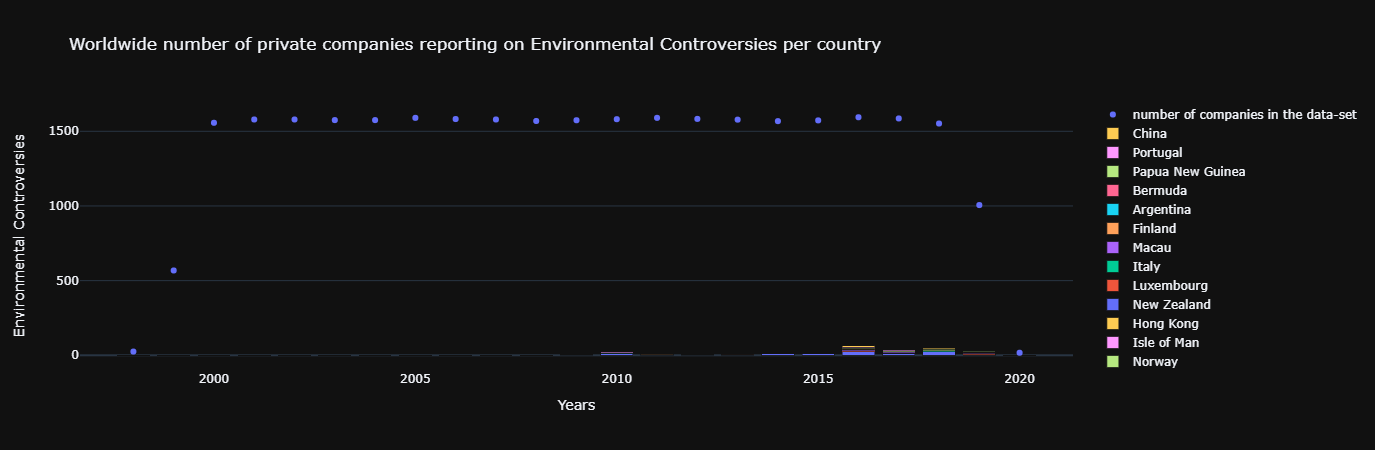

Aggregate data on a per-COUNTRY basis for Environmental Controversies  \
Year                                                                                      1998   
United States of America                                                  0                      
Switzerland                                                               0                      
France                                                                    0                      
Japan                                                                     0                      
Australia                                                                 0                      
Singapore                                                                 0                      
Spain                                                                     0                      
Germany                                                                   0                      
United Kingdom                                                            0                      
Canada                                                                    0                      
Sweden                                                                    0                      
Israel                                                                    0                      
Austria                                                                   0                      
Belgium                                                                   0                      
Denmark                                                                   0                      
Netherlands                                                               0                      
Ireland; Republic of                                                      0                      
Norway                                                                    0                      
Isle of Man                                                               0                      
Hong Kong                                                                 0                      
New Zealand                                                               0                      
Luxembourg                                                                0                      
Italy                                                                     0                      
Macau                                                                     0                      
Finland                                                                   0                      
Argentina                                                                 0                      
Bermuda                                                                   0                      
Papua New Guinea                                                          0                      
Portugal                                                                  0                      
China                                                                     0                      

                                                                            \
Year                     1999 2000 2001 2002 2003 2004 2005 2006 2007 2008   
United States of America    0    0    0    0    0    0    0    0    0    0   
Switzerland                 0    0    0    0    0    0    0    0    0    0   
France                      0    0    0    0    0    0    0    0    0    0   
Japan                       0    0    0    0    0    0    0    0    0    0   
Australia                   0    0    0    0    0    0    0    0    0    0   
Singapore                   0    0    0    0    0    0    0    0    0    0   
Spain                       0    0    0    0    0    0    0    0    0    0   
Germany                     0    0    0    0    0    0    0    0    0    0   
United Kingdom              0    0    0    0    0    0    0    0    0    0   
Canada                      0 

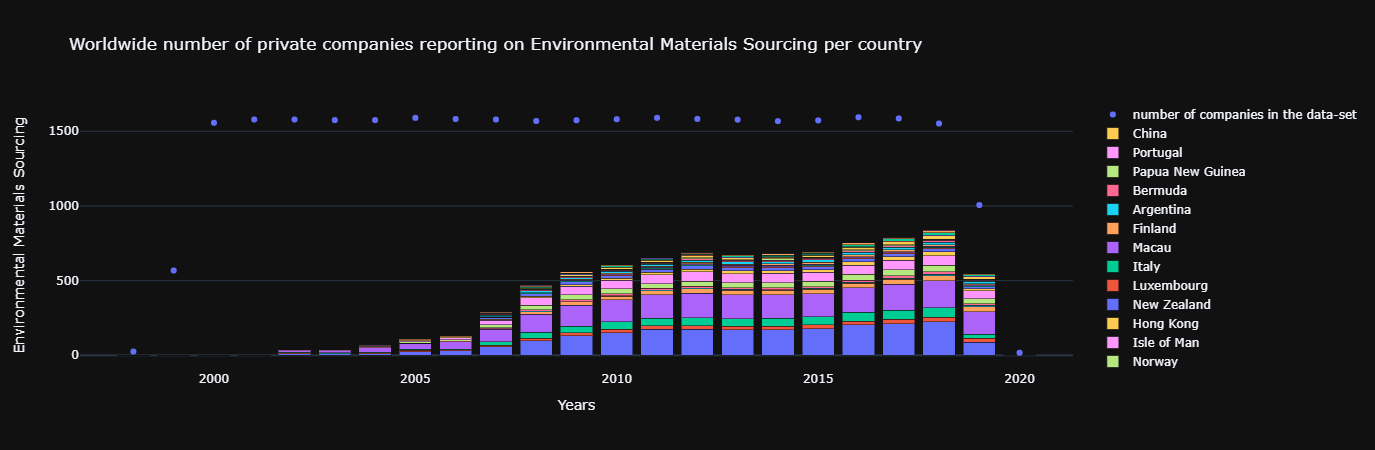

Aggregate data on a per-COUNTRY basis for Environmental Materials Sourcing  \
Year                                                                                           1998   
United States of America                                                  0                           
Switzerland                                                               0                           
France                                                                    0                           
Japan                                                                     0                           
Australia                                                                 0                           
Singapore                                                                 0                           
Spain                                                                     0                           
Germany                                                                   0                           
United Kingdom                                                            0                           
Canada                                                                    0                           
Sweden                                                                    0                           
Israel                                                                    0                           
Austria                                                                   0                           
Belgium                                                                   0                           
Denmark                                                                   0                           
Netherlands                                                               0                           
Ireland; Republic of                                                      0                           
Norway                                                                    0                           
Isle of Man                                                               0                           
Hong Kong                                                                 0                           
New Zealand                                                               0                           
Luxembourg                                                                0                           
Italy                                                                     0                           
Macau                                                                     0                           
Finland                                                                   0                           
Argentina                                                                 0                           
Bermuda                                                                   0                           
Papua New Guinea                                                          0                           
Portugal                                                                  0                           
China                                                                     0                           

                                                                            \
Year                     1999 2000 2001 2002 2003 2004 2005 2006 2007 2008   
United States of America    0    0    0   10    9   10   25   29   56   98   
Switzerland                 0    0    0    5    3    4    8    5   10   16   
France                      0    0    0    5    6    8    8    8   25   39   
Japan                       0    0    0    9   11   29   38   48   82  121   
Australia                   0    0    0    0    0    0    0    1    5   17   
Singapore                   0    0    0    0    0    0    0    0    1    3   
Spain                       0    0    0    1    2    3    1    2    6   11   
Germany                   

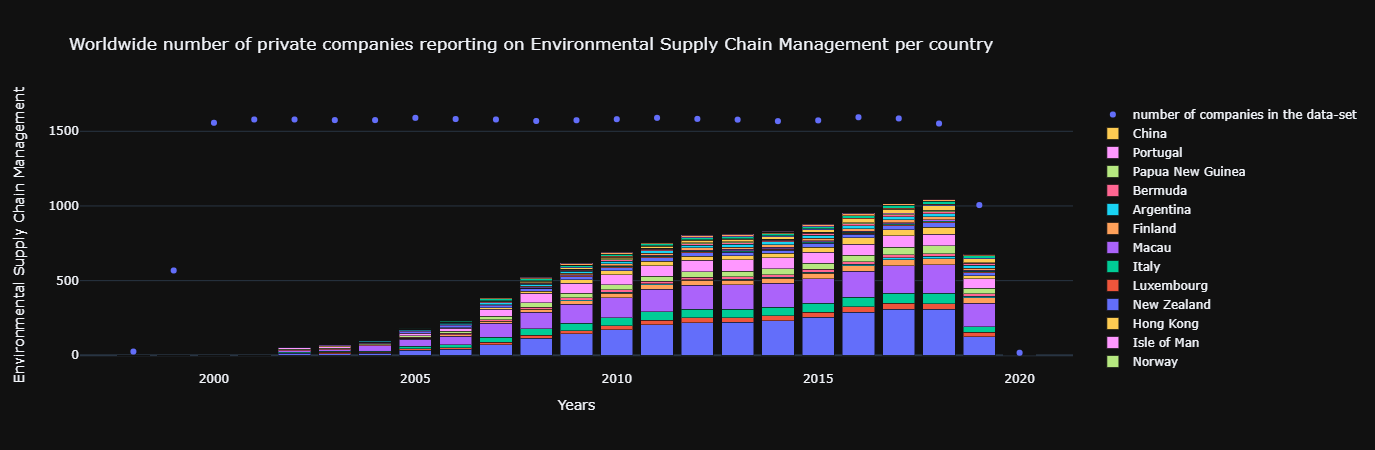

Aggregate data on a per-COUNTRY basis for Environmental Supply Chain Management  \
Year                                                                                                1998   
United States of America                                                  0                                
Switzerland                                                               0                                
France                                                                    0                                
Japan                                                                     0                                
Australia                                                                 0                                
Singapore                                                                 0                                
Spain                                                                     0                                
Germany                                                                   0                                
United Kingdom                                                            0                                
Canada                                                                    0                                
Sweden                                                                    0                                
Israel                                                                    0                                
Austria                                                                   0                                
Belgium                                                                   0                                
Denmark                                                                   0                                
Netherlands                                                               0                                
Ireland; Republic of                                                      0                                
Norway                                                                    0                                
Isle of Man                                                               0                                
Hong Kong                                                                 0                                
New Zealand                                                               0                                
Luxembourg                                                                0                                
Italy                                                                     0                                
Macau                                                                     0                                
Finland                                                                   0                                
Argentina                                                                 0                                
Bermuda                                                                   0                                
Papua New Guinea                                                          0                                
Portugal                                                                  0                                
China                                                                     0                                

                                                                            \
Year                     1999 2000 2001 2002 2003 2004 2005 2006 2007 2008   
United States of America    0    0    0   15   12   13   33   39   71  115   
Switzerland                 0    0    0    3    9    7   12   13   18   18   
France                      0    0    0    4    5    8   14   19   32   44   
Japan                       0    0    0    8   10   35   49   58   93  111   
Australia                   0    0    0    0    1    2    7    8   13   20   
Singapore             

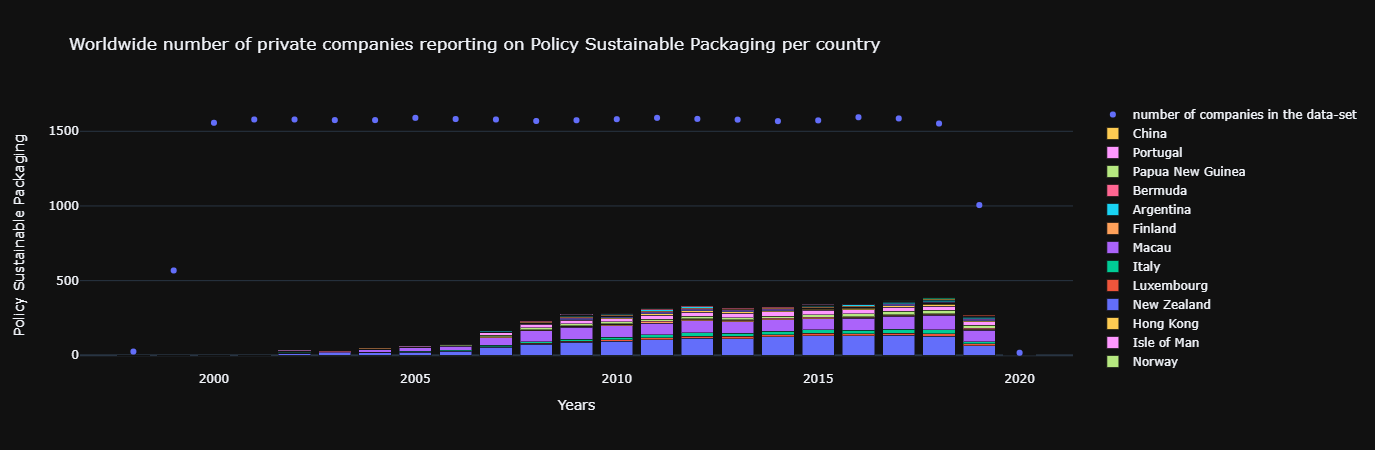

Aggregate data on a per-COUNTRY basis for Policy Sustainable Packaging  \
Year                                                                                       1998   
United States of America                                                  0                       
Switzerland                                                               0                       
France                                                                    0                       
Japan                                                                     0                       
Australia                                                                 0                       
Singapore                                                                 0                       
Spain                                                                     0                       
Germany                                                                   0                       
United Kingdom                                                            0                       
Canada                                                                    0                       
Sweden                                                                    0                       
Israel                                                                    0                       
Austria                                                                   0                       
Belgium                                                                   0                       
Denmark                                                                   0                       
Netherlands                                                               0                       
Ireland; Republic of                                                      0                       
Norway                                                                    0                       
Isle of Man                                                               0                       
Hong Kong                                                                 0                       
New Zealand                                                               0                       
Luxembourg                                                                0                       
Italy                                                                     0                       
Macau                                                                     0                       
Finland                                                                   0                       
Argentina                                                                 0                       
Bermuda                                                                   0                       
Papua New Guinea                                                          0                       
Portugal                                                                  0                       
China                                                                     0                       

                                                                            \
Year                     1999 2000 2001 2002 2003 2004 2005 2006 2007 2008   
United States of America    0    0    0   15   16   19   21   26   53   73   
Switzerland                 0    0    0    0    0    0    1    3    3    7   
France                      0    0    0    4    1    2    5    5   10   12   
Japan                       0    0    0    7    8   17   24   28   53   71   
Australia                   0    0    0    0    0    1    2    2    4    6   
Singapore                   0    0    0    0    0    0    0    0    0    0   
Spain                       0    0    0    1    1    0    0    0    2    3   
Germany                     0    0    0    4    3    0    4    4    9   12   
United Kingdom              0    0    0    5    2    6    6    7   16   23  

In [47]:
test3 = test2.Aggregate_Per_Country_Stacked_Bar()

Let's test this '*Aggregate_Per_Sector_Line_Graph*' Python Class's function.
*N.B.*: remember that the default variables for '*Aggregate_Per_Sector_Line_Graph()*' are:

*Percent = True, \
Line_graph_theme = 'solar', \
Start_graph_year = 2000, \
End_graph_year = 2019, \
save_excel = False*

But here we let *Percent = False*

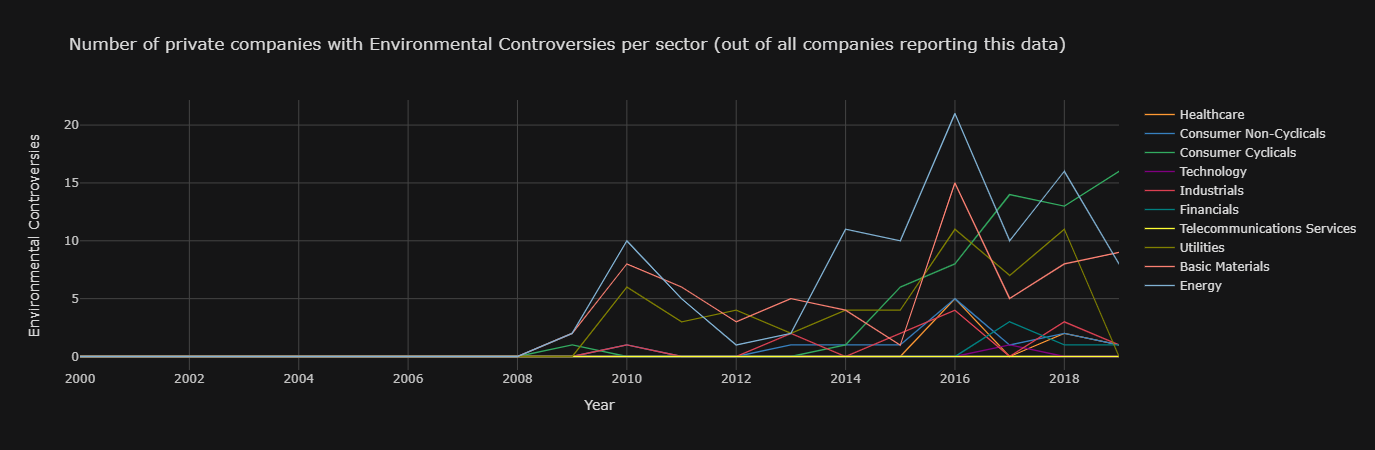

Aggregate data on a per-SECTOR basis for Environmental Controversies  \
Year                                                                                        1998   
Healthcare                                                                   0                     
Consumer Non-Cyclicals                                                       0                     
Consumer Cyclicals                                                           0                     
Technology                                                                   0                     
Industrials                                                                  0                     
Financials                                                                   0                     
Telecommunications Services                                                  0                     
Utilities                                                                    0                     
Basic Materials                                                              0                     
Energy                                                                       0                     

                                                                               \
Year                        1999 2000 2001 2002 2003 2004 2005 2006 2007 2008   
Healthcare                     0    0    0    0    0    0    0    0    0    0   
Consumer Non-Cyclicals         0    0    0    0    0    0    0    0    0    0   
Consumer Cyclicals             0    0    0    0    0    0    0    0    0    0   
Technology                     0    0    0    0    0    0    0    0    0    0   
Industrials                    0    0    0    0    0    0    0    0    0    0   
Financials                     0    0    0    0    0    0    0    0    0    0   
Telecommunications Services    0    0    0    0    0    0    0    0    0    0   
Utilities                      0    0    0    0    0    0    0    0    0    0   
Basic Materials                0    0    0    0    0    0    0    0    0    0   
Energy                         0    0    0    0    0    0    0    0    0    0   

                                                                               \
Year                        2009 2010 2011 2012 2013 2014 2015 2016 2017 2018   
Healthcare                     0    0    0    0    0    0    0    5    0    2   
Consumer Non-Cyclicals         0    1    0    0    1    1    1    5    1    2   
Consumer Cyclicals             1    0    0    0    0    1    6    8   14   13   
Technology                     0    0    0    0    0    0    0    0    1    0   
Industrials                    0    1    0    0    2    0    2    4    0    3   
Financials                     0    0    0    0    0    0    0    0    3    1   
Telecommunications Services    0    0    0    0    0    0    0    0    0    0   
Utilities                      0    6    3    4    2    4    4   11    7   11   
Basic Materials                2    8    6    3    5    4    1   15    5    8   
Energy                         2   10    5    1    2   11   10   21   10   16   

                                       
Year                        2019 2020  
Healthcare                     1    0  
Consumer Non-Cyclicals         1    0  
Consumer Cyclicals            16    0  
Technology                     0    0  
Industrials                    1    0  
Financials                     1    0  
Telecommunications Services    0    0  
Utilities                      0    0  
Basic Materials                9    0  
Energy                         8    0

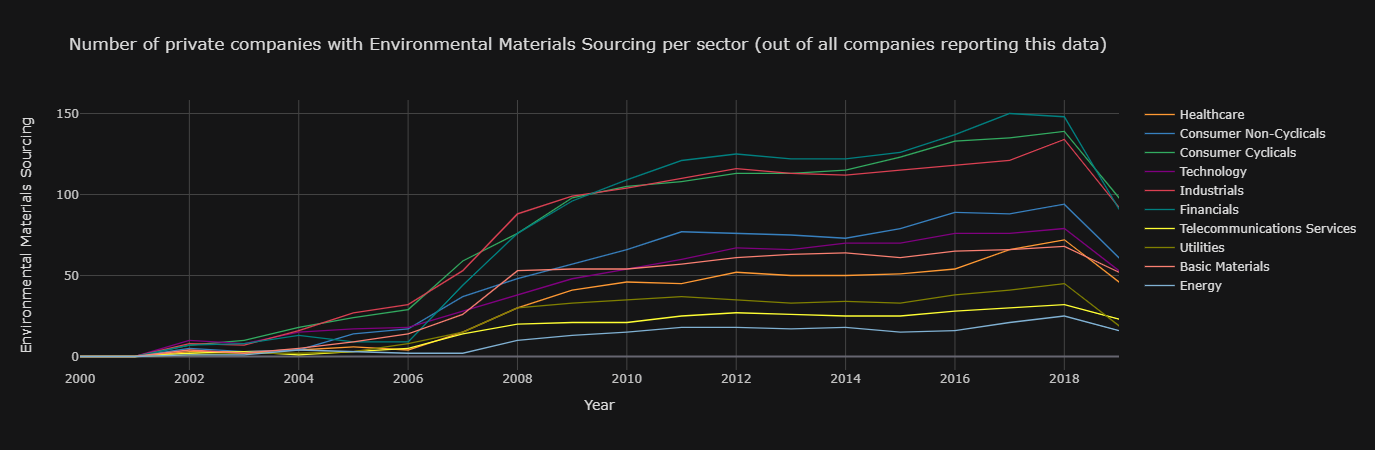

Aggregate data on a per-SECTOR basis for Environmental Materials Sourcing  \
Year                                                                                             1998   
Healthcare                                                                   0                          
Consumer Non-Cyclicals                                                       0                          
Consumer Cyclicals                                                           0                          
Technology                                                                   0                          
Industrials                                                                  0                          
Financials                                                                   0                          
Telecommunications Services                                                  0                          
Utilities                                                                    0                          
Basic Materials                                                              0                          
Energy                                                                       0                          

                                                                               \
Year                        1999 2000 2001 2002 2003 2004 2005 2006 2007 2008   
Healthcare                     0    0    0    3    3    4    6    4   15   30   
Consumer Non-Cyclicals         0    0    0    5    3    4   14   17   37   48   
Consumer Cyclicals             0    0    0    7   10   18   24   29   59   76   
Technology                     0    0    0   10    8   15   17   18   28   38   
Industrials                    0    0    0    8    7   16   27   32   53   88   
Financials                     0    0    0    7    8   13    9    9   44   76   
Telecommunications Services    0    0    0    2    3    1    3    5   14   20   
Utilities                      0    0    0    1    2    2    3    8   15   30   
Basic Materials                0    0    0    4    2    5    9   14   26   53   
Energy                         0    0    0    1    1    4    3    2    2   10   

                                                                               \
Year                        2009 2010 2011 2012 2013 2014 2015 2016 2017 2018   
Healthcare                    41   46   45   52   50   50   51   54   66   72   
Consumer Non-Cyclicals        57   66   77   76   75   73   79   89   88   94   
Consumer Cyclicals            98  105  108  113  113  115  123  133  135  139   
Technology                    48   54   60   67   66   70   70   76   76   79   
Industrials                   99  104  110  116  113  112  115  118  121  134   
Financials                    96  109  121  125  122  122  126  137  150  148   
Telecommunications Services   21   21   25   27   26   25   25   28   30   32   
Utilities                     33   35   37   35   33   34   33   38   41   45   
Basic Materials               54   54   57   61   63   64   61   65   66   68   
Energy                        13   15   18   18   17   18   15   16   21   25   

                                       
Year                        2019 2020  
Healthcare                    46    0  
Consumer Non-Cyclicals        61    0  
Consumer Cyclicals            98    3  
Technology                    53    2  
Industrials                   92    1  
Financials                    91    1  
Telecommunications Services   23    0  
Utilities                     19    0  
Basic Materials               52    0  
Energy                        16    0

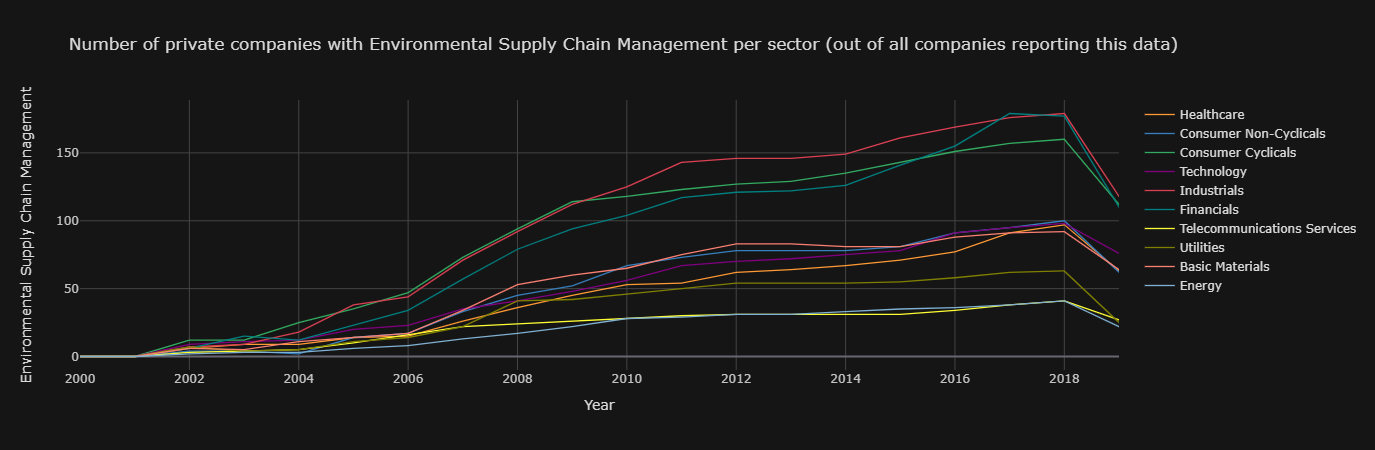

Aggregate data on a per-SECTOR basis for Environmental Supply Chain Management  \
Year                                                                                                  1998   
Healthcare                                                                   0                               
Consumer Non-Cyclicals                                                       0                               
Consumer Cyclicals                                                           0                               
Technology                                                                   0                               
Industrials                                                                  0                               
Financials                                                                   0                               
Telecommunications Services                                                  0                               
Utilities                                                                    0                               
Basic Materials                                                              0                               
Energy                                                                       0                               

                                                                               \
Year                        1999 2000 2001 2002 2003 2004 2005 2006 2007 2008   
Healthcare                     0    0    0    6    9    9   14   15   26   36   
Consumer Non-Cyclicals         0    0    0    4    4    2   14   17   33   45   
Consumer Cyclicals             0    0    0   12   12   25   35   47   73   94   
Technology                     0    0    0    9   11   12   20   23   35   41   
Industrials                    0    0    0    7    9   18   38   44   71   92   
Financials                     0    0    0    6   15   12   23   34   57   79   
Telecommunications Services    0    0    0    3    4    5   10   16   22   24   
Utilities                      0    0    0    7    4    5   11   14   22   41   
Basic Materials                0    0    0    6    5   11   14   17   34   53   
Energy                         0    0    0    2    3    3    6    8   13   17   

                                                                               \
Year                        2009 2010 2011 2012 2013 2014 2015 2016 2017 2018   
Healthcare                    45   53   54   62   64   67   71   77   91   97   
Consumer Non-Cyclicals        52   67   73   78   78   78   81   91   95  100   
Consumer Cyclicals           114  118  123  127  129  135  143  151  157  160   
Technology                    48   56   67   70   72   75   78   91   95   98   
Industrials                  112  125  143  146  146  149  161  169  176  179   
Financials                    94  104  117  121  122  126  141  155  179  177   
Telecommunications Services   26   28   30   31   31   31   31   34   38   41   
Utilities                     42   46   50   54   54   54   55   58   62   63   
Basic Materials               60   65   75   83   83   81   81   88   91   92   
Energy                        22   28   29   31   31   33   35   36   38   41   

                                       
Year                        2019 2020  
Healthcare                    63    0  
Consumer Non-Cyclicals        62    0  
Consumer Cyclicals           112    4  
Technology                    76    2  
Industrials                  118    2  
Financials                   110    1  
Telecommunications Services   27    0  
Utilities                     25    0  
Basic Materials               64    0  
Energy                        22    0

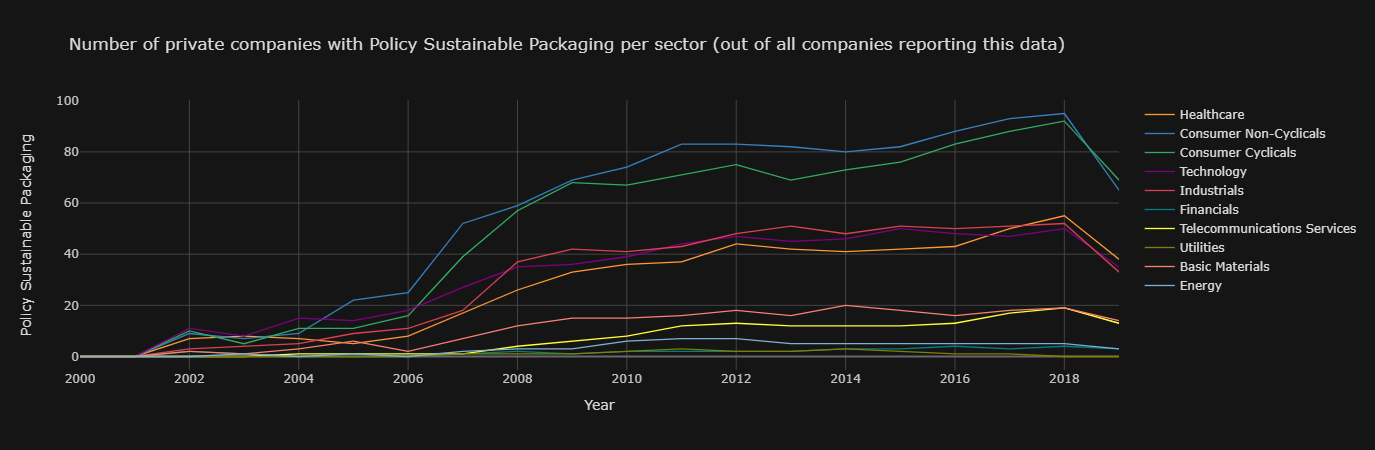

Aggregate data on a per-SECTOR basis for Policy Sustainable Packaging  \
Year                                                                                         1998   
Healthcare                                                                   0                      
Consumer Non-Cyclicals                                                       0                      
Consumer Cyclicals                                                           0                      
Technology                                                                   0                      
Industrials                                                                  0                      
Financials                                                                   0                      
Telecommunications Services                                                  0                      
Utilities                                                                    0                      
Basic Materials                                                              0                      
Energy                                                                       0                      

                                                                               \
Year                        1999 2000 2001 2002 2003 2004 2005 2006 2007 2008   
Healthcare                     0    0    0    7    8    7    5    8   17   26   
Consumer Non-Cyclicals         0    0    0    9    7    9   22   25   52   59   
Consumer Cyclicals             0    0    0   10    5   11   11   16   39   57   
Technology                     0    0    0   11    8   15   14   18   27   35   
Industrials                    0    0    0    3    4    5    9   11   18   37   
Financials                     0    0    0    2    1    0    0    0    1    2   
Telecommunications Services    0    0    0    0    0    1    1    1    1    4   
Utilities                      0    0    0    0    0    0    0    0    1    1   
Basic Materials                0    0    0    2    1    3    6    2    7   12   
Energy                         0    0    0    0    1    0    1    0    2    3   

                                                                               \
Year                        2009 2010 2011 2012 2013 2014 2015 2016 2017 2018   
Healthcare                    33   36   37   44   42   41   42   43   50   55   
Consumer Non-Cyclicals        69   74   83   83   82   80   82   88   93   95   
Consumer Cyclicals            68   67   71   75   69   73   76   83   88   92   
Technology                    36   39   44   47   45   46   50   48   47   50   
Industrials                   42   41   43   48   51   48   51   50   51   52   
Financials                     1    2    2    2    2    3    3    4    3    4   
Telecommunications Services    6    8   12   13   12   12   12   13   17   19   
Utilities                      1    2    3    2    2    3    2    1    1    0   
Basic Materials               15   15   16   18   16   20   18   16   18   19   
Energy                         3    6    7    7    5    5    5    5    5    5   

                                       
Year                        2019 2020  
Healthcare                    38    0  
Consumer Non-Cyclicals        65    1  
Consumer Cyclicals            69    3  
Technology                    35    1  
Industrials                   33    1  
Financials                     3    0  
Telecommunications Services   13    0  
Utilities                      0    0  
Basic Materials               14    0  
Energy                         3    0

In [48]:
test4 = test2.Aggregate_Per_Sector_Line_Graph(Percent = False)

One may also get attributes from the Python Class created. Bellow, we retrieve the filled in data-frame from which all graphs are created.

In [50]:
ESG_Boolean_Data().get_data().df

Instrument   Country of Headquarters TRBC Economic Sector Name  \
0          ZTS.N  United States of America                Healthcare   
1          ZTS.N  United States of America                Healthcare   
2          ZTS.N  United States of America                Healthcare   
3          ZTS.N  United States of America                Healthcare   
4          ZTS.N  United States of America                Healthcare   
...          ...                       ...                       ...   
31598   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
31599   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
31600   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
31601   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
31602   CARLb.CO                   Denmark    Consumer Non-Cyclicals   

                       Date Environmental Controversies                  Date  \
0      2018-12-31T00:00:00Z                       False  2018-12-31T00:00:00Z   
1      2017-12-31T00:00:00Z                       False  2017-12-31T00:00:00Z   
2      2016-12-31T00:00:00Z                       False  2016-12-31T00:00:00Z   
3      2015-12-31T00:00:00Z                       False  2015-12-31T00:00:00Z   
4      2014-12-31T00:00:00Z                       False  2014-12-31T00:00:00Z   
...                     ...                         ...                   ...   
31598  2004-12-31T00:00:00Z                       False  2004-12-31T00:00:00Z   
31599  2003-12-31T00:00:00Z                       False  2003-12-31T00:00:00Z   
31600  2002-12-31T00:00:00Z                       False  2002-12-31T00:00:00Z   
31601  2001-12-31T00:00:00Z                              2001-12-31T00:00:00Z   
31602  2000-12-31T00:00:00Z                              2000-12-31T00:00:00Z   

      Environmental Materials Sourcing                  Date  \
0                                 True  2018-12-31T00:00:00Z   
1                                False  2017-12-31T00:00:00Z   
2                                False  2016-12-31T00:00:00Z   
3                                False  2015-12-31T00:00:00Z   
4                                False  2014-12-31T00:00:00Z   
...                                ...                   ...   
31598                            False  2004-12-31T00:00:00Z   
31599                            False  2003-12-31T00:00:00Z   
31600                            False  2002-12-31T00:00:00Z   
31601                                   2001-12-31T00:00:00Z   
31602                                   2000-12-31T00:00:00Z   

      Environmental Supply Chain Management                  Date  \
0                                      True  2018-12-31T00:00:00Z   
1                                      True  2017-12-31T00:00:00Z   
2                                      True  2016-12-31T00:00:00Z   
3                                      True  2015-12-31T00:00:00Z   
4                                      True  2014-12-31T00:00:00Z   
...                                     ...                   ...   
31598                                 False  2004-12-31T00:00:00Z   
31599                                 False  2003-12-31T00:00:00Z   
31600                                 False  2002-12-31T00:00:00Z   
31601                                        2001-12-31T00:00:00Z   
31602                                        2000-12-31T00:00:00Z   

      Policy Sustainable Packaging   Years  
0                            False  2018.0  
1                            False  2017.0  
2                            False  2016.0  
3                            False  2015.0  
4                            False  2014.0  
...                            ...     ...  
31598                        False  2004.0  
31599                        False  2003.0  
31600                        False  2002.0  
31601                               2001.0  
31602                               2000.0  

[31603 rows x 12 columns]

$$ \\ \\ $$

### Percentage data:

Waste Recycled to Total Waste is a ratio - a percentage - already, so we don't need to aggregate the number of companies that report for this field. Instead, we use the median per country and/or sector to unveil insights behind the data:

Let's go through the function step by step.

- 1st: define its variables; let them be the following by default:

In [51]:
Companies = ['0#.MIWO00000PUS']
Fields = ['TR.AnalyticWasteRecyclingRatio']
SDate = '0'
EDate = '-19'
Period = 'FY0'
Frq = 'FY'
Limit = 0
Per_country = True
Per_sector = True
Display = True
Start_graph_year = 2000
End_graph_year = 2019

- 2nd: create a list with the fields asking for the country and sector of each company requested. This list is to appended with the list of companies to request info. for.

In [52]:
_Fields = ['TR.HeadquartersCountry', 'TR.TRBCEconomicSector']
for i in Fields:
    _Fields.append(i + ".date") # Collect the date for this data point
    _Fields.append(i) # We obviously want the data point in question
_Fields

['TR.HeadquartersCountry',
 'TR.TRBCEconomicSector',
 'TR.AnalyticWasteRecyclingRatio.date',
 'TR.AnalyticWasteRecyclingRatio']

- 3rd: request data from Refintiv:

In [53]:
# Collect data from Refinitiv
df, err = ek.get_data(instruments = Companies,
                      fields = _Fields,
                      parameters = {'SDate':SDate,
                                    'EDate':EDate,
                                    'Period':Period,
                                    'Frq':Frq})
df

Instrument   Country of Headquarters TRBC Economic Sector Name  \
0          ZTS.N  United States of America                Healthcare   
1         NOVN.S               Switzerland                Healthcare   
2         NOVN.S                                                       
3         NOVN.S                                                       
4         NOVN.S                                                       
...          ...                       ...                       ...   
17842   CARLb.CO                                                       
17843   CARLb.CO                                                       
17844   CARLb.CO                                                       
17845   CARLb.CO                                                       
17846   CARLb.CO                                                       

                       Date  Waste Recycled To Total Waste  
0                                                      NaN  
1      2018-12-31T00:00:00Z                       0.684651  
2      2017-12-31T00:00:00Z                       0.674286  
3      2016-12-31T00:00:00Z                       0.629398  
4      2015-12-31T00:00:00Z                       0.633946  
...                     ...                            ...  
17842  2004-12-31T00:00:00Z                            NaN  
17843  2003-12-31T00:00:00Z                            NaN  
17844  2002-12-31T00:00:00Z                            NaN  
17845  2001-12-31T00:00:00Z                            NaN  
17846  2000-12-31T00:00:00Z                            NaN  

[17847 rows x 5 columns]

- 4th: Collect the name of the fields we are interested in:

In [54]:
Fields_Names = list(df.iloc[:,[3 + 2*i + 1 for i in range(int((len(_Fields) - 2)/2))]].columns)
Fields_Names

['Waste Recycled To Total Waste']

- 5th: Now we will populate every 'Country of Headquarters' and 'TRBC Economic Sector Name' column in our newly defined 'df' pandas data-frame

In [55]:
for i in range(len(df.index)):
    if df["Country of Headquarters"][i] == "":
        df["Country of Headquarters"].iloc[i] = str(df["Country of Headquarters"][i-1])
    if df["TRBC Economic Sector Name"][i] == "":
        df["TRBC Economic Sector Name"].iloc[i] = str(df["TRBC Economic Sector Name"][i-1])
df

Instrument   Country of Headquarters TRBC Economic Sector Name  \
0          ZTS.N  United States of America                Healthcare   
1         NOVN.S               Switzerland                Healthcare   
2         NOVN.S               Switzerland                Healthcare   
3         NOVN.S               Switzerland                Healthcare   
4         NOVN.S               Switzerland                Healthcare   
...          ...                       ...                       ...   
17842   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
17843   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
17844   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
17845   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
17846   CARLb.CO                   Denmark    Consumer Non-Cyclicals   

                       Date  Waste Recycled To Total Waste  
0                                                      NaN  
1      2018-12-31T00:00:00Z                       0.684651  
2      2017-12-31T00:00:00Z                       0.674286  
3      2016-12-31T00:00:00Z                       0.629398  
4      2015-12-31T00:00:00Z                       0.633946  
...                     ...                            ...  
17842  2004-12-31T00:00:00Z                            NaN  
17843  2003-12-31T00:00:00Z                            NaN  
17844  2002-12-31T00:00:00Z                            NaN  
17845  2001-12-31T00:00:00Z                            NaN  
17846  2000-12-31T00:00:00Z                            NaN  

[17847 rows x 5 columns]

- 6th: Construct a straight-forward 'Years' column

In [56]:
df_years = []
# the following if statement is there to account for any empty values in the "Date" df column
for i in range(len(df.index)):
    if str(df["Date"].iloc[i])[:4] == "":
        df_years.append(numpy.nan)
    else:
        df_years.append(int(str(df["Date"].iloc[i])[:4]))
df["Years"] = df_years
df

Instrument   Country of Headquarters TRBC Economic Sector Name  \
0          ZTS.N  United States of America                Healthcare   
1         NOVN.S               Switzerland                Healthcare   
2         NOVN.S               Switzerland                Healthcare   
3         NOVN.S               Switzerland                Healthcare   
4         NOVN.S               Switzerland                Healthcare   
...          ...                       ...                       ...   
17842   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
17843   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
17844   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
17845   CARLb.CO                   Denmark    Consumer Non-Cyclicals   
17846   CARLb.CO                   Denmark    Consumer Non-Cyclicals   

                       Date  Waste Recycled To Total Waste   Years  
0                                                      NaN     NaN  
1      2018-12-31T00:00:00Z                       0.684651  2018.0  
2      2017-12-31T00:00:00Z                       0.674286  2017.0  
3      2016-12-31T00:00:00Z                       0.629398  2016.0  
4      2015-12-31T00:00:00Z                       0.633946  2015.0  
...                     ...                            ...     ...  
17842  2004-12-31T00:00:00Z                            NaN  2004.0  
17843  2003-12-31T00:00:00Z                            NaN  2003.0  
17844  2002-12-31T00:00:00Z                            NaN  2002.0  
17845  2001-12-31T00:00:00Z                            NaN  2001.0  
17846  2000-12-31T00:00:00Z                            NaN  2000.0  

[17847 rows x 6 columns]

- 7th: Make a Python variable containing all the countries we saw this far

In [57]:
countries = df["Country of Headquarters"].unique()
countries

array(['United States of America', 'Switzerland', 'France', 'Japan',
       'Australia', 'Singapore', 'Spain', 'Germany', 'United Kingdom',
       'Canada', 'Sweden', 'Israel', 'Austria', 'Belgium', 'Denmark',
       'Netherlands', 'Ireland; Republic of', 'Norway', 'Isle of Man',
       'Hong Kong', 'New Zealand', 'Luxembourg', 'Italy', 'Macau',
       'Finland', 'Argentina', 'Bermuda', 'Papua New Guinea', 'Portugal',
       'China'], dtype=object)

- 8th: Make a Python variable containing all the sectors we saw this far

In [58]:
sectors = df["TRBC Economic Sector Name"].unique()
sectors

array(['Healthcare', 'Consumer Non-Cyclicals', 'Consumer Cyclicals',
       'Technology', 'Industrials', 'Financials',
       'Telecommunications Services', 'Utilities', 'Basic Materials',
       'Energy'], dtype=object)

- 9th: Make a Python variable containing all the years in our data-frame

In [59]:
years = [str(i)[:4] for i in df["Date"]]
years = numpy.unique(numpy.array(years))[1:].astype(numpy.int) # The 0th value is an empty string
years

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

- 10th: Aggregate data on a per-country basis

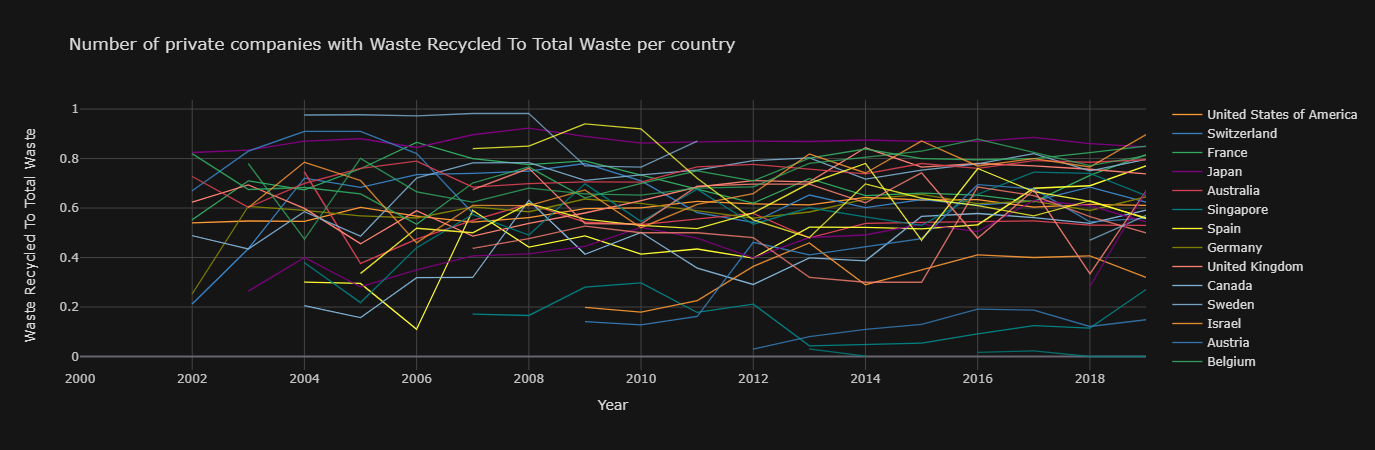

None

Aggregate data on a per-COUNTRY basis for Waste Recycled To Total Waste


1998  1999  2000  2001      2002      2003  \
United States of America   NaN   NaN   NaN   NaN  0.540000  0.547500   
Switzerland                NaN   NaN   NaN   NaN  0.211988  0.435206   
France                     NaN   NaN   NaN   NaN  0.552718  0.710000   
Japan                      NaN   NaN   NaN   NaN  0.824360  0.833734   
Australia                  NaN   NaN   NaN   NaN       NaN       NaN   
Singapore                  NaN   NaN   NaN   NaN       NaN       NaN   
Spain                      NaN   NaN   NaN   NaN  0.716914       NaN   
Germany                    NaN   NaN   NaN   NaN  0.253526  0.606645   
United Kingdom             NaN   NaN   NaN   NaN  0.623942  0.693765   
Canada                     NaN   NaN   NaN   NaN       NaN       NaN   
Sweden                     NaN   NaN   NaN   NaN  0.488527  0.434469   
Israel                     NaN   NaN   NaN   NaN       NaN       NaN   
Austria                    NaN   NaN   NaN   NaN  0.670000  0.829996   
Belgium                    NaN   NaN   NaN   NaN  0.820000  0.675000   
Denmark                    NaN   NaN   NaN   NaN       NaN  0.264001   
Netherlands                NaN   NaN   NaN   NaN  0.727273  0.603076   
Ireland; Republic of       NaN   NaN   NaN   NaN       NaN       NaN   
Norway                     NaN   NaN   NaN   NaN       NaN       NaN   
Isle of Man                NaN   NaN   NaN   NaN       NaN       NaN   
Hong Kong                  NaN   NaN   NaN   NaN       NaN       NaN   
New Zealand                NaN   NaN   NaN   NaN       NaN       NaN   
Luxembourg                 NaN   NaN   NaN   NaN       NaN       NaN   
Italy                      NaN   NaN   NaN   NaN       NaN  0.601674   
Macau                      NaN   NaN   NaN   NaN       NaN       NaN   
Finland                    NaN   NaN   NaN   NaN       NaN  0.780000   
Argentina                  NaN   NaN   NaN   NaN       NaN       NaN   
Bermuda                    NaN   NaN   NaN   NaN       NaN       NaN   
Papua New Guinea           NaN   NaN   NaN   NaN       NaN       NaN   
Portugal                   NaN   NaN   NaN   NaN       NaN       NaN   
China                      NaN   NaN   NaN   NaN       NaN       NaN   

                              2004      2005      2006      2007      2008  \
United States of America  0.546229  0.602942  0.567695  0.543020  0.560899   
Switzerland               0.721035  0.683148  0.735217  0.739998  0.749109   
France                    0.673125  0.758710  0.865235  0.800001  0.775587   
Japan                     0.870587  0.879986  0.844717  0.896158  0.922923   
Australia                 0.746151  0.376585  0.474486  0.549966  0.616511   
Singapore                      NaN       NaN       NaN  0.171069  0.165587   
Spain                     0.300348  0.295287  0.110000  0.590000  0.442192   
Germany                   0.590164  0.568306  0.559766  0.604316  0.585003   
United Kingdom            0.598290  0.455274  0.589381  0.486898  0.538322   
Canada                    0.205936  0.157233  0.318666  0.319676  0.630731   
Sweden                    0.585128  0.486486  0.721392  0.782751  0.783679   
Israel                         NaN       NaN       NaN       NaN       NaN   
Austria                   0.910003  0.910000  0.820005  0.579995       NaN   
Belgium                   0.683000  0.657000  0.534488  0.701136  0.765960   
Denmark                   0.400000  0.281321  0.350010  0.406987  0.415001   
Netherlands               0.700000  0.760000  0.789474  0.684219  0.698246   
Ireland; Republic of      0.378500  0.217647  0.439489  0.573795  0.490637   
Norway                         NaN  0.335860  0.518225  0.500000  0.618916   
Isle of Man                    NaN       NaN       NaN       NaN       NaN   
Hong Kong                      NaN       NaN       NaN  0.674642  0.760486   
New Zealand                    NaN       NaN       NaN  0.436807  0.476615   
Luxembourg                0.976000  0.977000  0.972000  0.982000  0.982000   

In [60]:
df_countries_list = []
if Per_country == True:
    for field_name in Fields_Names:
        df_countries = pandas.DataFrame(index = countries)
        for year in years:
            lis = [] # list to be appended
            for country in countries:
                if len(df[df["Country of Headquarters"] == country][df["Years"] == year].loc[:,field_name].dropna()) >= Limit:
                    lis.append(numpy.median(df[df["Country of Headquarters"] == country][df["Years"] == year].loc[:,field_name].dropna()))
                else:
                    lis.append(numpy.nan)
            df_countries[str(year)] = lis
        graph = df_countries.T.loc[str(Start_graph_year):str(End_graph_year)].iplot(title = "Number of private companies with " + field_name + " per country",
                                                                                    yaxis_title = field_name,
                                                                                    xaxis_title = "Year",
                                                                                    theme = "solar")
        if Display == True:
            display(graph)
        df_countries_list.append([str("Aggregate data on a per-COUNTRY basis for " + field_name),
                                  df_countries,
                                  graph])
print(df_countries_list[0][0])
pandas.DataFrame(df_countries_list[0][1])

- 11th: Aggregate data on a per-sector basis

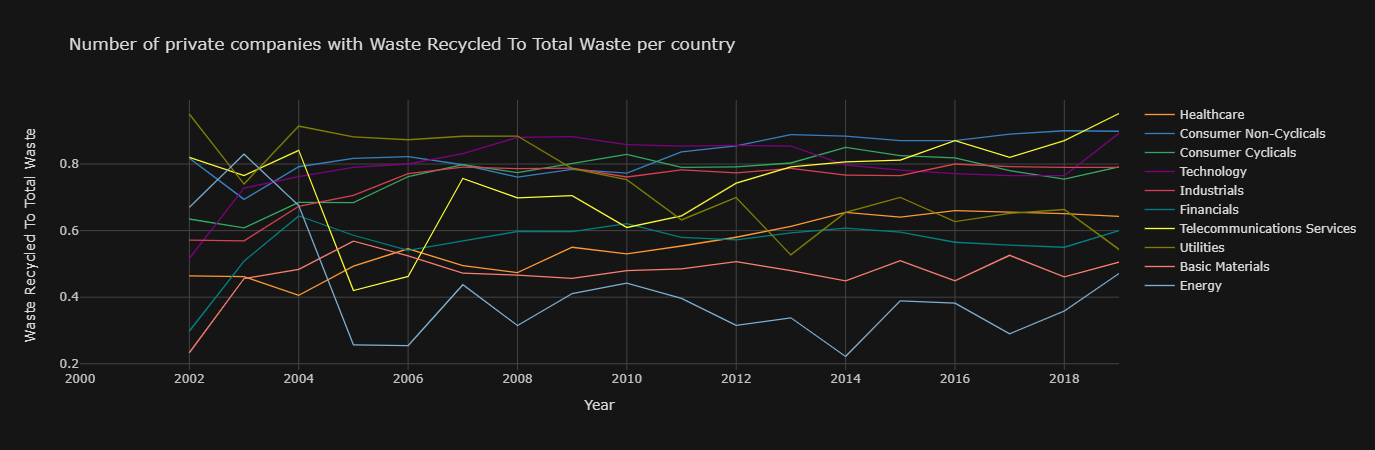

None

Aggregate data on a per-SECTOR basis for Waste Recycled To Total Waste


1998  1999  2000  2001      2002      2003  \
Healthcare                    NaN   NaN   NaN   NaN  0.463870  0.461885   
Consumer Non-Cyclicals        NaN   NaN   NaN   NaN  0.817568  0.693765   
Consumer Cyclicals            NaN   NaN   NaN   NaN  0.634816  0.608000   
Technology                    NaN   NaN   NaN   NaN  0.516336  0.727876   
Industrials                   NaN   NaN   NaN   NaN  0.571421  0.569128   
Financials                    NaN   NaN   NaN   NaN  0.298424  0.508362   
Telecommunications Services   NaN   NaN   NaN   NaN  0.820000  0.765505   
Utilities                     NaN   NaN   NaN   NaN  0.949765  0.740000   
Basic Materials               NaN   NaN   NaN   NaN  0.233540  0.455604   
Energy                        NaN   NaN   NaN   NaN  0.670000  0.829996   

                                 2004      2005      2006      2007      2008  \
Healthcare                   0.405765  0.493358  0.545392  0.494968  0.473596   
Consumer Non-Cyclicals       0.791828  0.817026  0.822385  0.797799  0.760702   
Consumer Cyclicals           0.685000  0.684178  0.762500  0.798279  0.774263   
Technology                   0.762201  0.790159  0.799995  0.831209  0.880309   
Industrials                  0.673125  0.706114  0.770951  0.790783  0.786164   
Financials                   0.643824  0.586052  0.540454  0.568492  0.597280   
Telecommunications Services  0.840693  0.420000  0.462243  0.756495  0.698066   
Utilities                    0.914142  0.881528  0.872934  0.883347  0.884071   
Basic Materials              0.483834  0.568306  0.524113  0.472631  0.465993   
Energy                       0.675145  0.256503  0.254792  0.437418  0.315100   

                                 2009      2010      2011      2012      2013  \
Healthcare                   0.549998  0.530000  0.553782  0.580000  0.612831   
Consumer Non-Cyclicals       0.784071  0.772676  0.836520  0.854626  0.888204   
Consumer Cyclicals           0.802486  0.829173  0.790171  0.791192  0.803093   
Technology                   0.882003  0.858392  0.853868  0.855727  0.853382   
Industrials                  0.787686  0.761000  0.782405  0.773229  0.786717   
Financials                   0.596924  0.621212  0.580000  0.572006  0.593156   
Telecommunications Services  0.705019  0.609467  0.644336  0.742383  0.791622   
Utilities                    0.786477  0.753051  0.632108  0.699499  0.527155   
Basic Materials              0.456346  0.480000  0.485124  0.506596  0.479598   
Energy                       0.410978  0.442026  0.396208  0.315539  0.337947   

                                 2014      2015      2016      2017      2018  \
Healthcare                   0.654650  0.640758  0.660146  0.656500  0.650872   
Consumer Non-Cyclicals       0.884000  0.870000  0.870000  0.890000  0.900000   
Consumer Cyclicals           0.849999  0.825500  0.818509  0.780500  0.754941   
Technology                   0.796721  0.781943  0.770869  0.765065  0.765000   
Industrials                  0.766637  0.764898  0.800000  0.791964  0.790000   
Financials                   0.607644  0.595455  0.565058  0.556150  0.550000   
Telecommunications Services  0.806215  0.812000  0.870000  0.820000  0.870000   
Utilities                    0.654500  0.699878  0.626873  0.651524  0.663329   
Basic Materials              0.449153  0.509677  0.449164  0.525822  0.461264   
Energy                       0.221836  0.388827  0.382000  0.290000  0.358384   

                                 2019      2020  
Healthcare                   0.642869       NaN  
Consumer Non-Cyclicals       0.898416       NaN  
Consumer Cyclicals           0.791500  0.786142  
Technology                   0.892365  0.774857  
Industrials                  0.790000  0.869584  
Financials                   0.599704  0.527596  
Telecommunications Services  0.951752       NaN  
Utilities                    0.543697       NaN  
Basic Materials              0.505496       NaN  
Energy                     

In [61]:
df_sectors_list = [] # list to be populated. The reason it is there (as opposed to after the ' if Per_sector == True: ' line) is that if the user of this function chose not to include sectors, inserting ' df_sectors_list ' at this point will output an empty list, which is appropriate.
if Per_sector == True: # This if statement regulates for the user choosing (or not choosing) to aggregate data on a 'per-sector' basis.
    for field_name in Fields_Names:
        df_sectors = pandas.DataFrame(index = sectors)
        for year in years:
            lis = [] # list to be appended
            for sector in sectors:
                if len(df[df["TRBC Economic Sector Name"] == sector][df["Years"] == year].loc[:,field_name].dropna()) >= Limit:
                    lis.append(numpy.median(df[df["TRBC Economic Sector Name"] == sector][df["Years"] == year].loc[:,field_name].dropna()))
                else:
                    lis.append(numpy.nan)
            df_sectors[str(year)] = lis
        graph = df_sectors.T.loc[str(Start_graph_year):str(End_graph_year)].iplot(title = "Number of private companies with " + field_name + " per country",
                                                                                    yaxis_title = field_name,
                                                                                    xaxis_title = "Year",
                                                                                    theme = "solar")
        if Display == True:
            display(graph)
        df_sectors_list.append([str("Aggregate data on a per-SECTOR basis for " + field_name),
                                  df_sectors,
                                  graph])
print(df_sectors_list[0][0])
pandas.DataFrame(df_sectors_list[0][1])

Finally we can build a **function** that does it all in one:

In [62]:
def ESGPercentage(Companies = ['0#.MIWO00000PUS'],
                  Fields = ['TR.AnalyticWasteRecyclingRatio'],
                  SDate = '0', EDate = '-19', Period = 'FY0', Frq = 'FY',
                  Limit = 0,
                  Per_country = True, Per_sector = True,
                  Display = True, Line_graph_theme = 'solar',
                  Start_graph_year = 2000, End_graph_year = 2019,
                  save_excel = True):
    
    """
    This function will output datasets and line graphs of the sum of 'true' values per year for each country and sector among the lit of companies defined in ' Companies '.
    It provides a list of lists of lists.
    The 1st list: switches between Country or Sector
    The 2nd: switches between 'Environmental Controversies' or 'Environmental Materials Sourcing'
    The 3rd: switches between the title/selection name, the (pandas) data-frame and the Pyplot.
    
    Companies (list of strings): list of the instrument RICs (Refinitiv Instrument Codes) defining the companies to look at.
    Defaulted to: ['0#.MIWO00000PUS']. 'MIWO00000PUS' is the Refinitiv Identifier Code (RIC) for the MSCI World Index in USD.
    
    Fields (list of strings): List of the fields wanted from Refinitiv in our informatics.
    Defaulted to: ['TR.AnalyticEnvControv', 'TR.EnvMaterialsSourcing', 'TR.EnvSupplyChainMgt', 'PolicySustainablePackaging'].
    
    SDate, EDate, Period, and Frq are string variables defining specifications of the data being retrieved from Refinitiv.
    Defaulted to: SDate = '0', EDate = '-19', Period = 'FY0', and Frq = 'FY'.
    
    Limit (int): is the number of minimum observation demanded to be included in the aggregation.
    If less than 'Limit' number of observations are retrieved for a specific year and country/sector, it is not included.
    Defaulted to: 0.
    
    Per_country (boolean): If True, returns data asked for aggregated on a 'per country' basis. Defaulted to: True.
    
    Per_sector (boolean): If True, returns data asked for aggregated on a 'per sector' basis. Defaulted to: True.
    
    Display (boolean): If True, returns data asked for in a Pyplot line graph. Defaulted to: True.
    
    Start_graph_year (int/str): The start year when user wishes the Pyplot line graph to start. Defaulted to: 2000.
    
    End_graph_year (int/str): The end year when user wishes the Pyplot line graph to start. Defaulted to: 2019.
    """
    
    # First: create a list with the fields asking for the country and sector of each company requested.
    # This list is to appended with the list of companies to request info. for.
    _Fields = ['TR.HeadquartersCountry', 'TR.TRBCEconomicSector']
    for i in Fields:
        _Fields.append(i + ".date") # Collect the date for this data point
        _Fields.append(i) # We obviously want the data point in question
    
    # Collect data from Refinitiv
    df, err = ek.get_data(instruments = Companies,
                          fields = _Fields,
                          parameters = {'SDate':SDate,
                                        'EDate':EDate,
                                        'Period':Period,
                                        'Frq':Frq})
    
    # Collect the name of the fields we are interested in:
    Fields_Names = list(df.iloc[:,[3 + 2*i + 1 for i in range(int((len(_Fields) - 2)/2))]].columns)
    
    # Now we will populate every 'Country of Headquarters' and 'TRBC Economic Sector Name' column in our newly defined 'df' pandas data-frame
    for i in range(len(df.index)):
        if df["Country of Headquarters"][i] == "":
            df["Country of Headquarters"].iloc[i] = str(df["Country of Headquarters"][i-1])
        if df["TRBC Economic Sector Name"][i] == "":
            df["TRBC Economic Sector Name"].iloc[i] = str(df["TRBC Economic Sector Name"][i-1])
    
    # Construct a straight-forward 'Years' column
    df_years = []
    # the following if statement is there to account for any empty values in the "Date" df column
    for i in range(len(df.index)):
        if str(df["Date"].iloc[i])[:4] == "":
            df_years.append(numpy.nan)
        else:
            df_years.append(int(str(df["Date"].iloc[i])[:4]))
    df["Years"] = df_years
    
    # Make a Python variable containing all the countries we saw this far
    countries = df["Country of Headquarters"].unique()
    
    # Make a Python variable containing all the sectors we saw this far
    sectors = df["TRBC Economic Sector Name"].unique()
    
    # Make a Python variable containing all the years in our data-frame
    years = [str(i)[:4] for i in df["Date"]]
    years = numpy.unique(numpy.array(years))[1:].astype(numpy.int) # The 0th value is an empty string
    
    if save_excel == True:
        # ' ExcelWriter ' is needed to create an Excel Workbook with multiple tabs/sheets
        writer = pandas.ExcelWriter("ESGPercentage.xlsx", engine = 'xlsxwriter')
        df.to_excel(writer, sheet_name = "df")
    
    # Aggregate data on a per-country basis
    df_countries_list = []
    if Per_country == True:
        for field_name,field in zip(Fields_Names,Fields):
            df_countries = pandas.DataFrame(index = countries)
            for year in years:
                lis = [] # list to be appended
                for country in countries:
                    if len(df[df["Country of Headquarters"] == country][df["Years"] == year].loc[:,field_name].dropna()) >= Limit:
                        lis.append(numpy.median(df[df["Country of Headquarters"] == country][df["Years"] == year].loc[:,field_name].dropna()))
                    else:
                        lis.append(numpy.nan)
                df_countries[str(year)] = lis
            graph = df_countries.T.loc[str(Start_graph_year):str(End_graph_year)].iplot(title = "Percentage of private companies' " + field_name + " per country",
                                                                                        yaxis_title = field_name,
                                                                                        xaxis_title = "Year",
                                                                                        theme = Line_graph_theme)
            if Display == True:
                display(graph)
            df_countries_list.append([str("Aggregate data on a per-COUNTRY basis for " + field_name),
                                      df_countries,
                                      graph])
            
            if save_excel == True:
                df_countries.to_excel(writer, sheet_name =  (field.replace("TR.", "")[0:21] + "_df_count"))
    
    # Aggregate data on a per-sector basis
    df_sectors_list = [] # list to be populated. The reason it is there (as opposed to after the ' if Per_sector == True: ' line) is that if the user of this function chose not to include sectors, inserting ' df_sectors_list ' at this point will output an empty list, which is appropriate.
    if Per_sector == True: # This if statement regulates for the user choosing (or not choosing) to aggregate data on a 'per-sector' basis.
        for field_name,field in zip(Fields_Names,Fields):
            df_sectors = pandas.DataFrame(index = sectors)
            for year in years:
                lis = [] # list to be appended
                for sector in sectors:
                    if len(df[df["TRBC Economic Sector Name"] == sector][df["Years"] == year].loc[:,field_name].dropna()) >= Limit:
                        lis.append(numpy.median(df[df["TRBC Economic Sector Name"] == sector][df["Years"] == year].loc[:,field_name].dropna()))
                    else:
                        lis.append(numpy.nan)
                df_sectors[str(year)] = lis
            graph = df_sectors.T.loc[str(Start_graph_year):str(End_graph_year)].iplot(title = "Percentage of private companies' " + field_name + " per sector",
                                                                                        yaxis_title = field_name,
                                                                                        xaxis_title = "Year",
                                                                                      theme = Line_graph_theme)
            if Display == True:
                display(graph)
            df_sectors_list.append([str("Aggregate data on a per-SECTOR basis for " + field_name),
                                      df_sectors,
                                      graph])
            
            if save_excel == True:
                df_sectors.to_excel(writer, sheet_name = field.replace("TR.", "")[0:23] + "_df_sec")
                writer.save()
                writer.close()
    
    return(df_countries_list,
           df_sectors_list,
           _Fields,
           df,
           Fields_Names,
           df_years,
           countries,
           sectors,
           years)

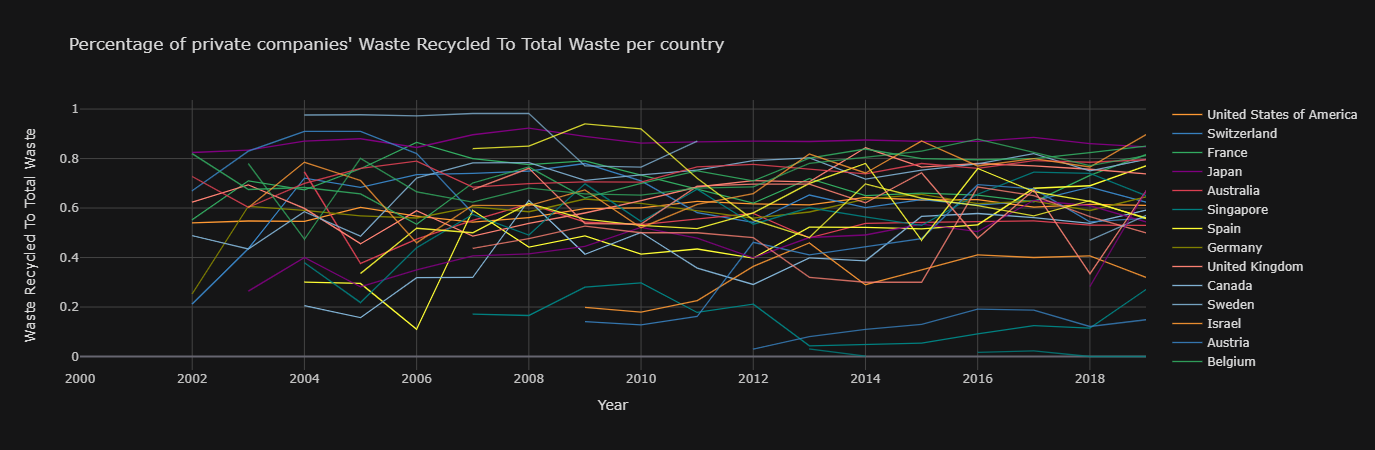

None

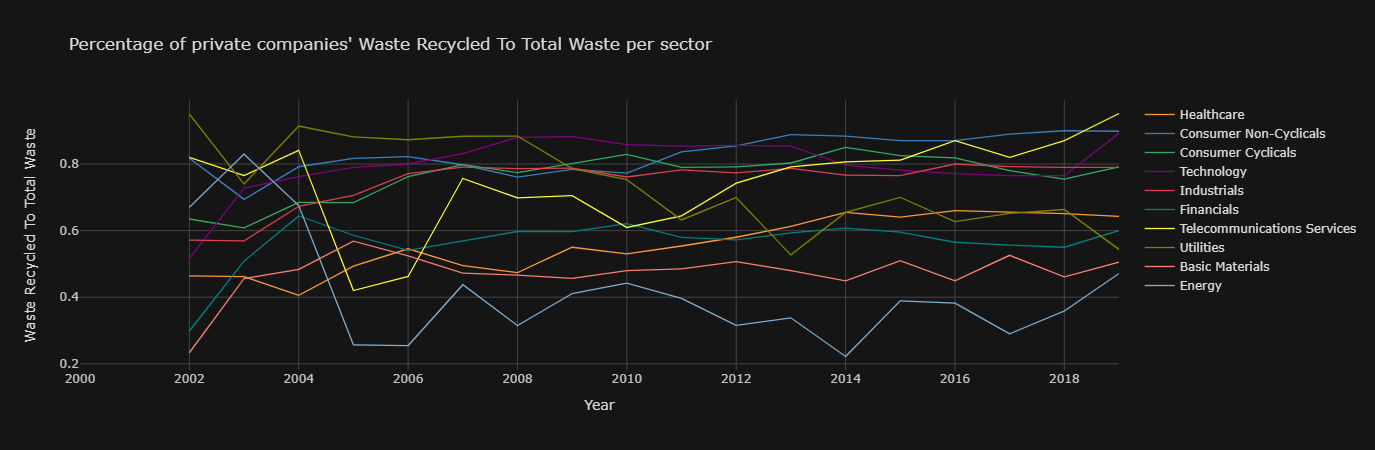

None

In [63]:
test5 = ESGPercentage(Companies = ['0#.MIWO00000PUS'],
                     Fields = ['TR.AnalyticWasteRecyclingRatio'],
                     SDate = '0', EDate = '-19', Period = 'FY0', Frq = 'FY',
                     Limit = 0,
                     Per_country = True, Per_sector = True,
                     Display = True,
                     Start_graph_year = 2000, End_graph_year = 2019)

$$ \\ $$
# Conclusion

ESG data can be aggregated on a per-country and -sector basis to allow users to gather insight behind the data. Above we outlined a class that allows anyone to do so with boolean data and a function for ratio/percentage ESG data.

## References

You can find more detail regarding the Eikon Data API and related technologies for this notebook from the following resources:
* [Refinitiv Eikon Data API page](https://developers.refinitiv.com/eikon-apis/eikon-data-api) on the [Refinitiv Developer Community](https://developers.refinitiv.com/) web site.
* [Eikon Data API Quick Start Guide page](https://developers.refinitiv.com/eikon-apis/eikon-data-api/quick-start).
* [Eikon Data API Tutorial page](https://developers.refinitiv.com/eikon-apis/eikon-data-api/learning).
* [Python Quants Video Tutorial Series for Eikon API](https://community.developers.refinitiv.com/questions/37865/announcement-new-python-quants-video-tutorial-seri.html).
* [Eikon Data APY Python Reference Guide](https://docs-developers.refinitiv.com/1584688434238/14684/book/en/index.html).
* [Eikon Data API Troubleshooting article](https://developers.refinitiv.com/article/eikon-data-apipython-troubleshooting-refinitiv).
* [Pandas API Reference](https://pandas.pydata.org/docs/reference/index.html).

For any question related to this example or Eikon Data API, please use the Developers Community [Q&A Forum](https://community.developers.refinitiv.com/spaces/92/eikon-scripting-apis.html).